In [156]:
library(readxl)
library(ggplot2)
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
library("np") #npreg: you may need to install it
library(PerformanceAnalytics)
library(psych)
#install.packages('fmsb')
library(fmsb) #For Spider Plots
#install.packages('countrycode')
library(countrycode)
#install.packages(c('hrbrthemes','viridis'))
#library(hrbrthemes)
#library(viridis)
#install.packages('GGally')
library(GGally)
library(dplyr)
library(ggmap)
library(leaflet)
library(htmltools)
library(dplyr) #getMap()
library(rgeos)
#install.packages('rworldmap')
library(rworldmap) #joinCountryData2Map
library(grid)
library(tidyr)
#install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", "ggspatial", "sf", "rnaturalearth", "rnaturalearthdata"))
library("sf")
library("rnaturalearth")
library("rnaturalearthdata")
#install.packages('writexl')
library(writexl)

In [157]:
df.wa.fa <- read_excel("../../results/df-wa-fa.xlsx",sheet=1)
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
df <- df.wa.fa[,c(2:6)]

df <- df %>% 
  rename(
    yard.ptap = PA1,
    spring.time = PA3,
    FA2 = PA2,
    FA4  = PA4,
    well.tmor = PA5
      
    )

head(df,7)

well.tmor,spring.time,yard.ptap,FA4,FA2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.484293,7.766254,21.423383,-37.17840,-34.38031
-15.287720,-2.043990,10.353373,-105.27108,-29.99453
3.793724,11.701558,24.138454,-34.53732,-11.63272
-21.628625,-9.910425,14.185828,-158.07442,-34.76002
-17.760454,-5.232463,18.216759,-79.51994,-29.12578
-19.770676,-14.145055,7.172001,-63.22687,-115.04561
6.163599,6.274546,24.644079,-47.97183,-48.23138


   well.tmor        spring.time        yard.ptap           FA4          
 Min.   :-31.709   Min.   :-19.069   Min.   :-17.49   Min.   :-163.330  
 1st Qu.:-19.771   1st Qu.: -7.931   1st Qu.: 12.34   1st Qu.: -69.652  
 Median : -3.416   Median :  2.508   Median : 23.57   Median : -56.309  
 Mean   : -5.653   Mean   :  3.304   Mean   : 20.34   Mean   : -63.521  
 3rd Qu.:  6.690   3rd Qu.: 11.304   3rd Qu.: 29.59   3rd Qu.: -44.463  
 Max.   : 23.479   Max.   : 39.562   Max.   : 51.96   Max.   :   1.305  
      FA2          
 Min.   :-115.046  
 1st Qu.: -47.513  
 Median : -29.768  
 Mean   : -34.864  
 3rd Qu.: -20.521  
 Max.   :  -4.959  

well.tmor,spring.time,yard.ptap,FA4,FA2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.484293,7.766254,21.423383,-37.17840,-34.38031
-15.287720,-2.043990,10.353373,-105.27108,-29.99453
3.793724,11.701558,24.138454,-34.53732,-11.63272
-21.628625,-9.910425,14.185828,-158.07442,-34.76002
-17.760454,-5.232463,18.216759,-79.51994,-29.12578
-19.770676,-14.145055,7.172001,-63.22687,-115.04561


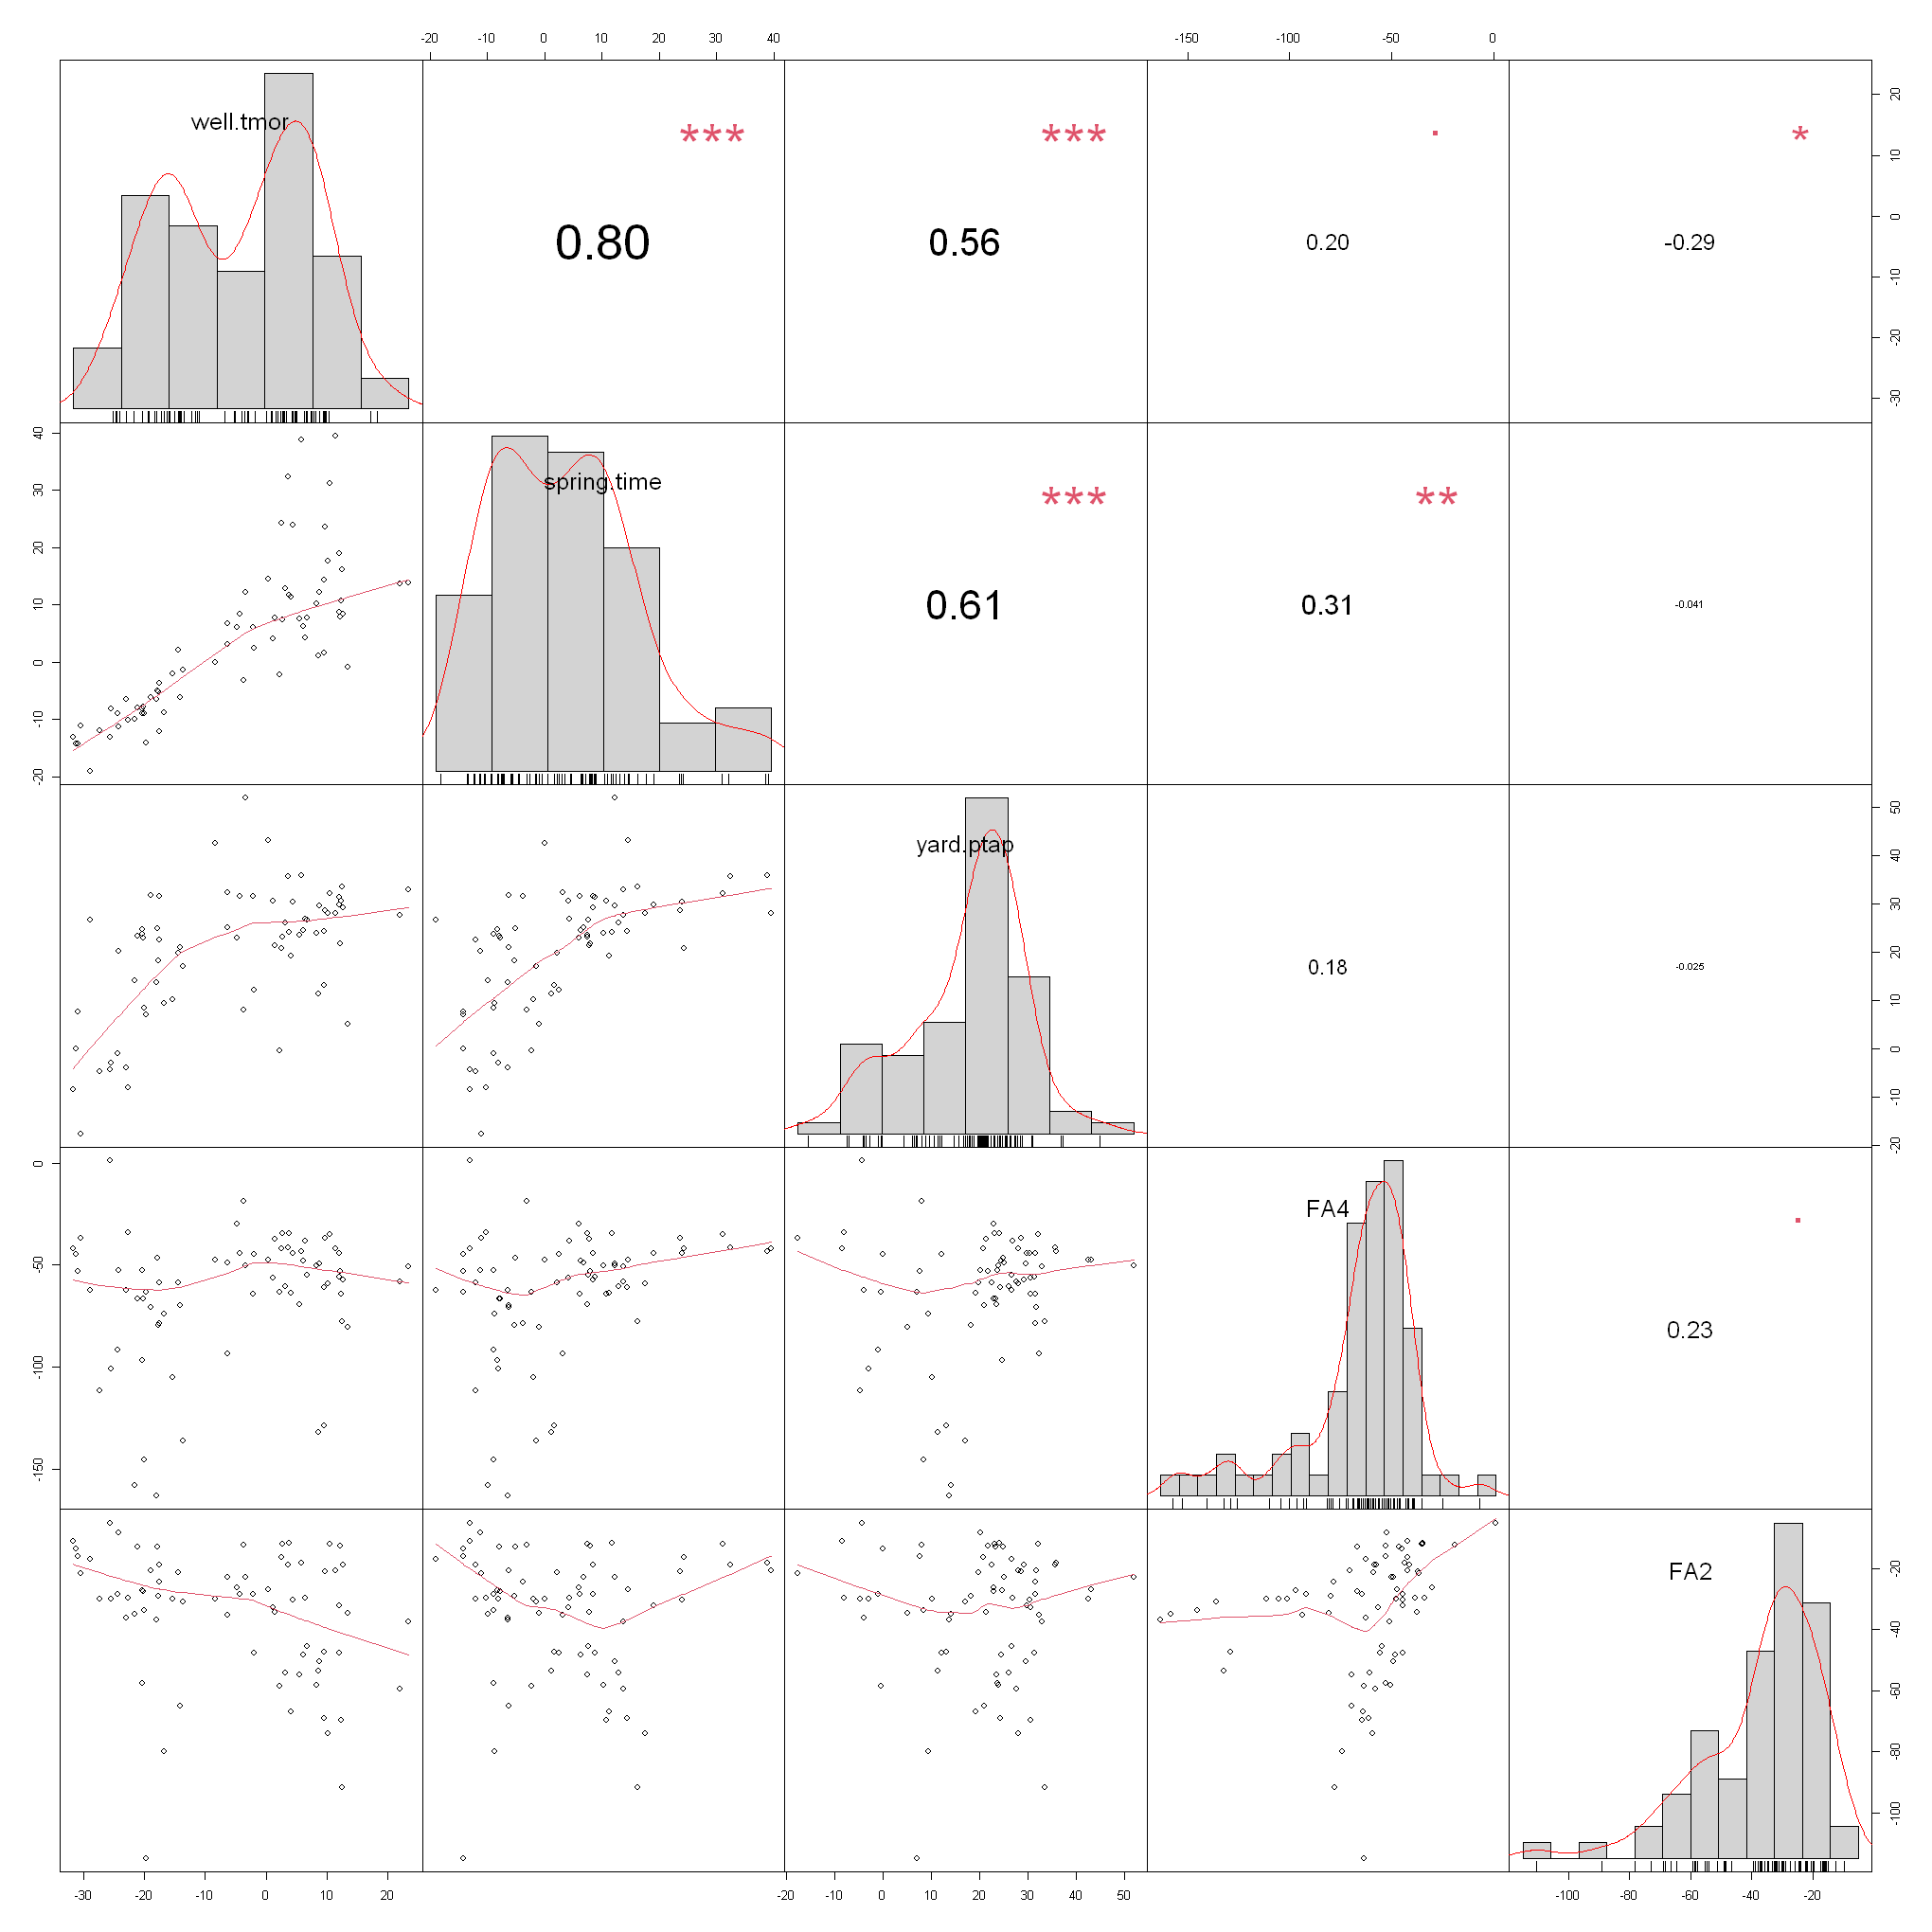

In [142]:
summary(df)
head(df)
chart.Correlation(df, histogram=TRUE, pch=19 , tl.cex = .7 )

In [158]:
# Create data: Water Accessibility Aggregate
dfsimple$clusters
df.wa.aggregate <- aggregate(df, list(clusters=dfsimple$clusters), mean)
df.wa.avg <- df.wa.aggregate[,1:6]
df.wa.avg

[1] 1 2 1 3 2 4 4 2 4 1 4 4 4 3 2 1 1 1 2 3 1 1 1 2 1 1 2 4 2 1 2 4 2 2 1 2 1 4
[39] 1 4 2 4 1 4 3 1 4 2 4 2 1 4 4 1 3 2 1 1 2 1 2 2 1 2 4 2 2 4 3 2 2 4 4

clusters,well.tmor,spring.time,yard.ptap,FA4,FA2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.151039,15.328826,30.51925,-44.51718,-23.59719
2,-21.547127,-8.252406,11.50414,-63.73637,-21.54798
3,-9.205853,-3.987128,13.01055,-143.96996,-39.49582
4,3.212022,5.530914,21.42849,-60.98306,-62.41122


In [144]:
# Dark2 code: ## [1] "#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A", "#66A61E", "#E6AB02" ,"#A6761D"
## [8] "#666666"

[1]  61.01833  72.07889 150.22046  90.16753

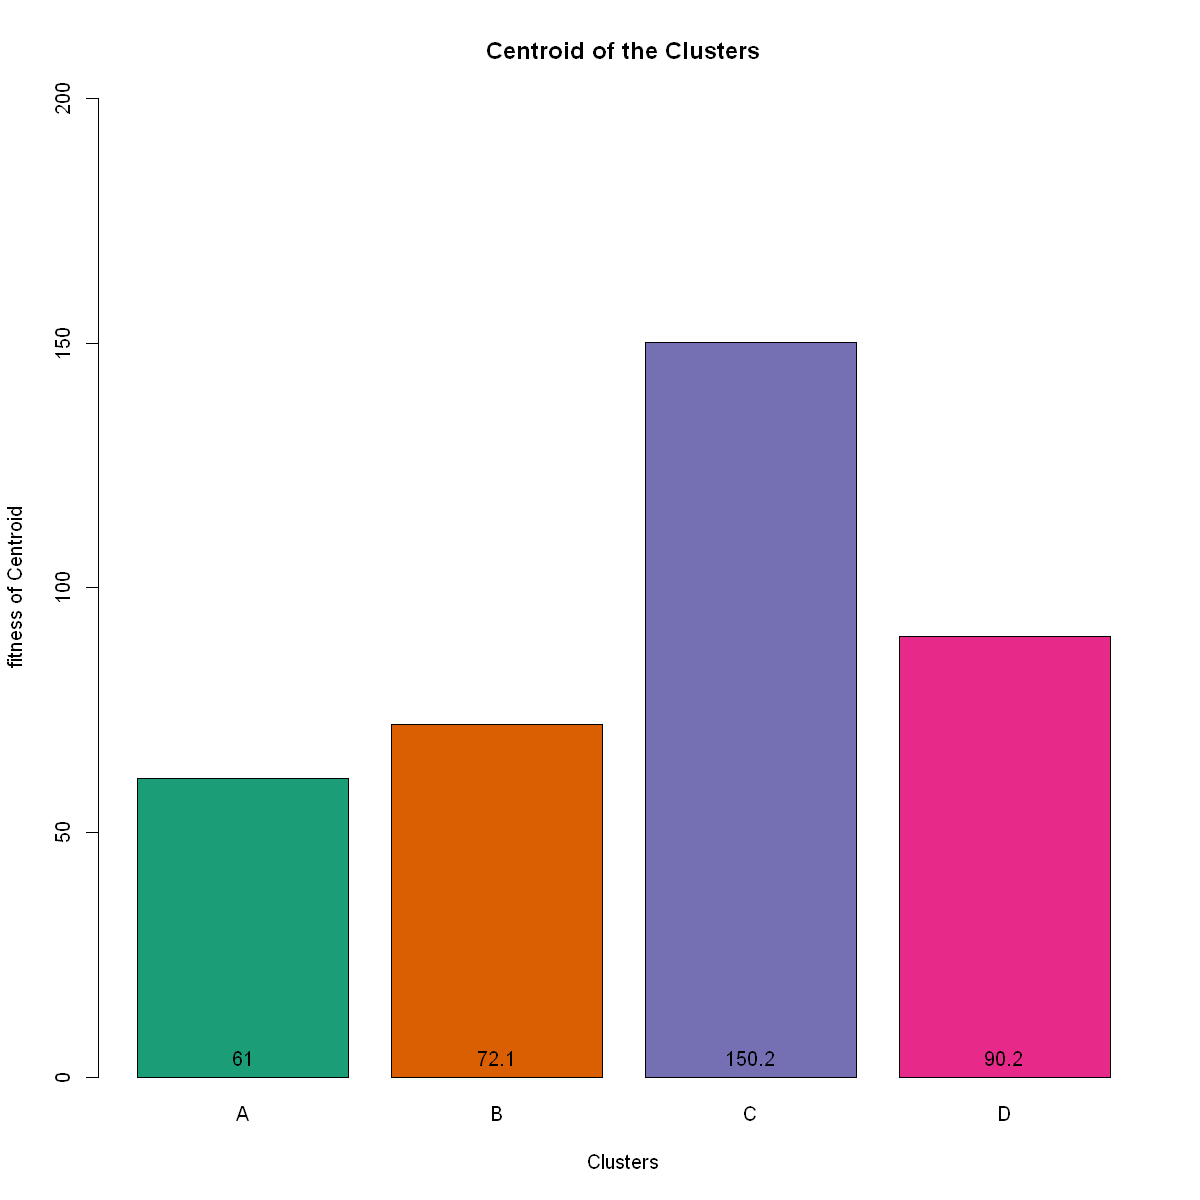

[1]  55.54924 111.02593  45.41069 164.20424  88.57988 133.69940

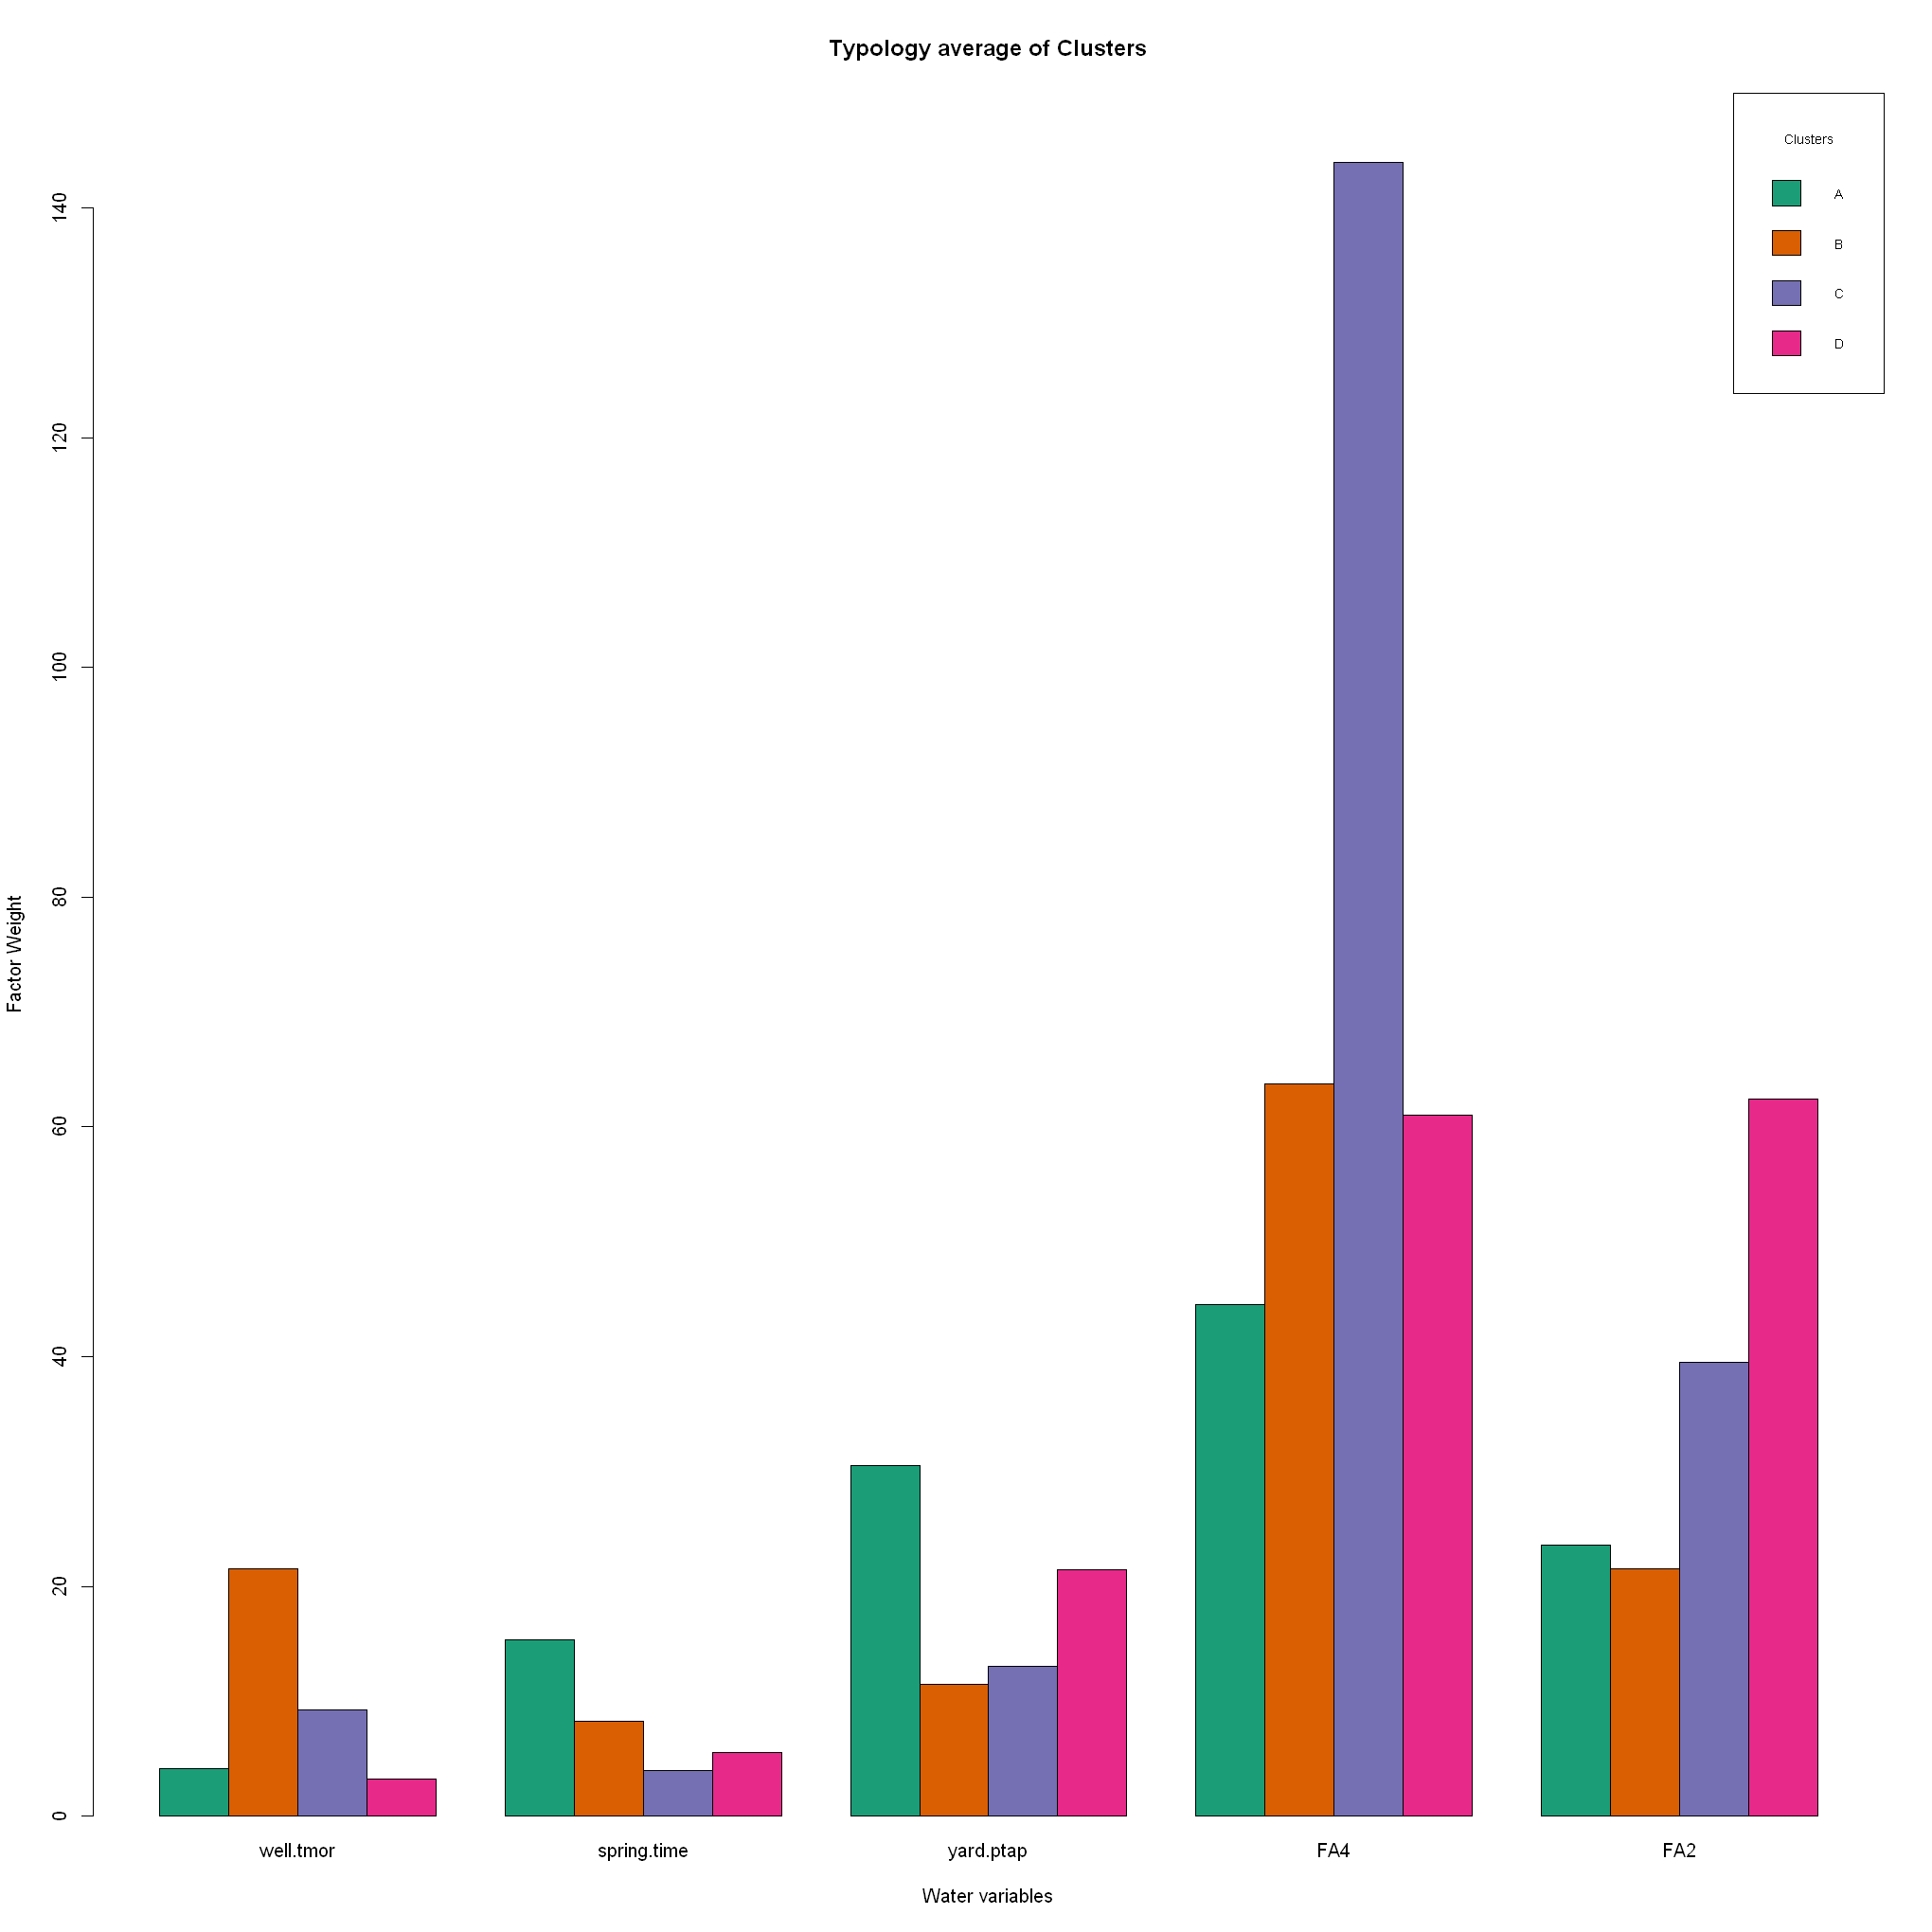

In [146]:
centroid <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the centroid of the cluster
centroid
                  
options(repr.plot.width=10, repr.plot.height=10)                  
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)

bp <- barplot(centroid,
        main = "Centroid of the Clusters", xlab = "Clusters", ylab = "fitness of Centroid",
        col = c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A"),
        ylim = c(0, 200), names.arg = c("A", "B", "C","D"))
text(bp, 0, round(centroid, 1),cex=1,pos=3)
options(repr.plot.width=17, repr.plot.height=17)
barplot(as.matrix(abs(df.wa.avg[,c(2:6)])),
        beside = TRUE,
        main = "Typology average of Clusters", xlab = "Water variables", ylab = "Factor Weight",
        col = c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A"),
        legend = c("A", "B", "C","D"), 
        args.legend = list(title = "Clusters", x = "topright", cex = .7), ylim = c(0, 150))
                  


centroiddf.wa <- apply(df, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster
head(centroiddf.wa)


,well.tmor,spring.time,yard.ptap,FA4,FA2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,200.000000,200.000000,200.00000,200.00000,200.00000
2,0.000000,0.000000,0.00000,0.00000,0.00000
3,4.151039,15.328826,30.51925,44.51718,23.59719
4,21.547127,8.252406,11.50414,63.73637,21.54798
5,9.205853,3.987128,13.01055,143.96996,39.49582
6,3.212022,5.530914,21.42849,60.98306,62.41122


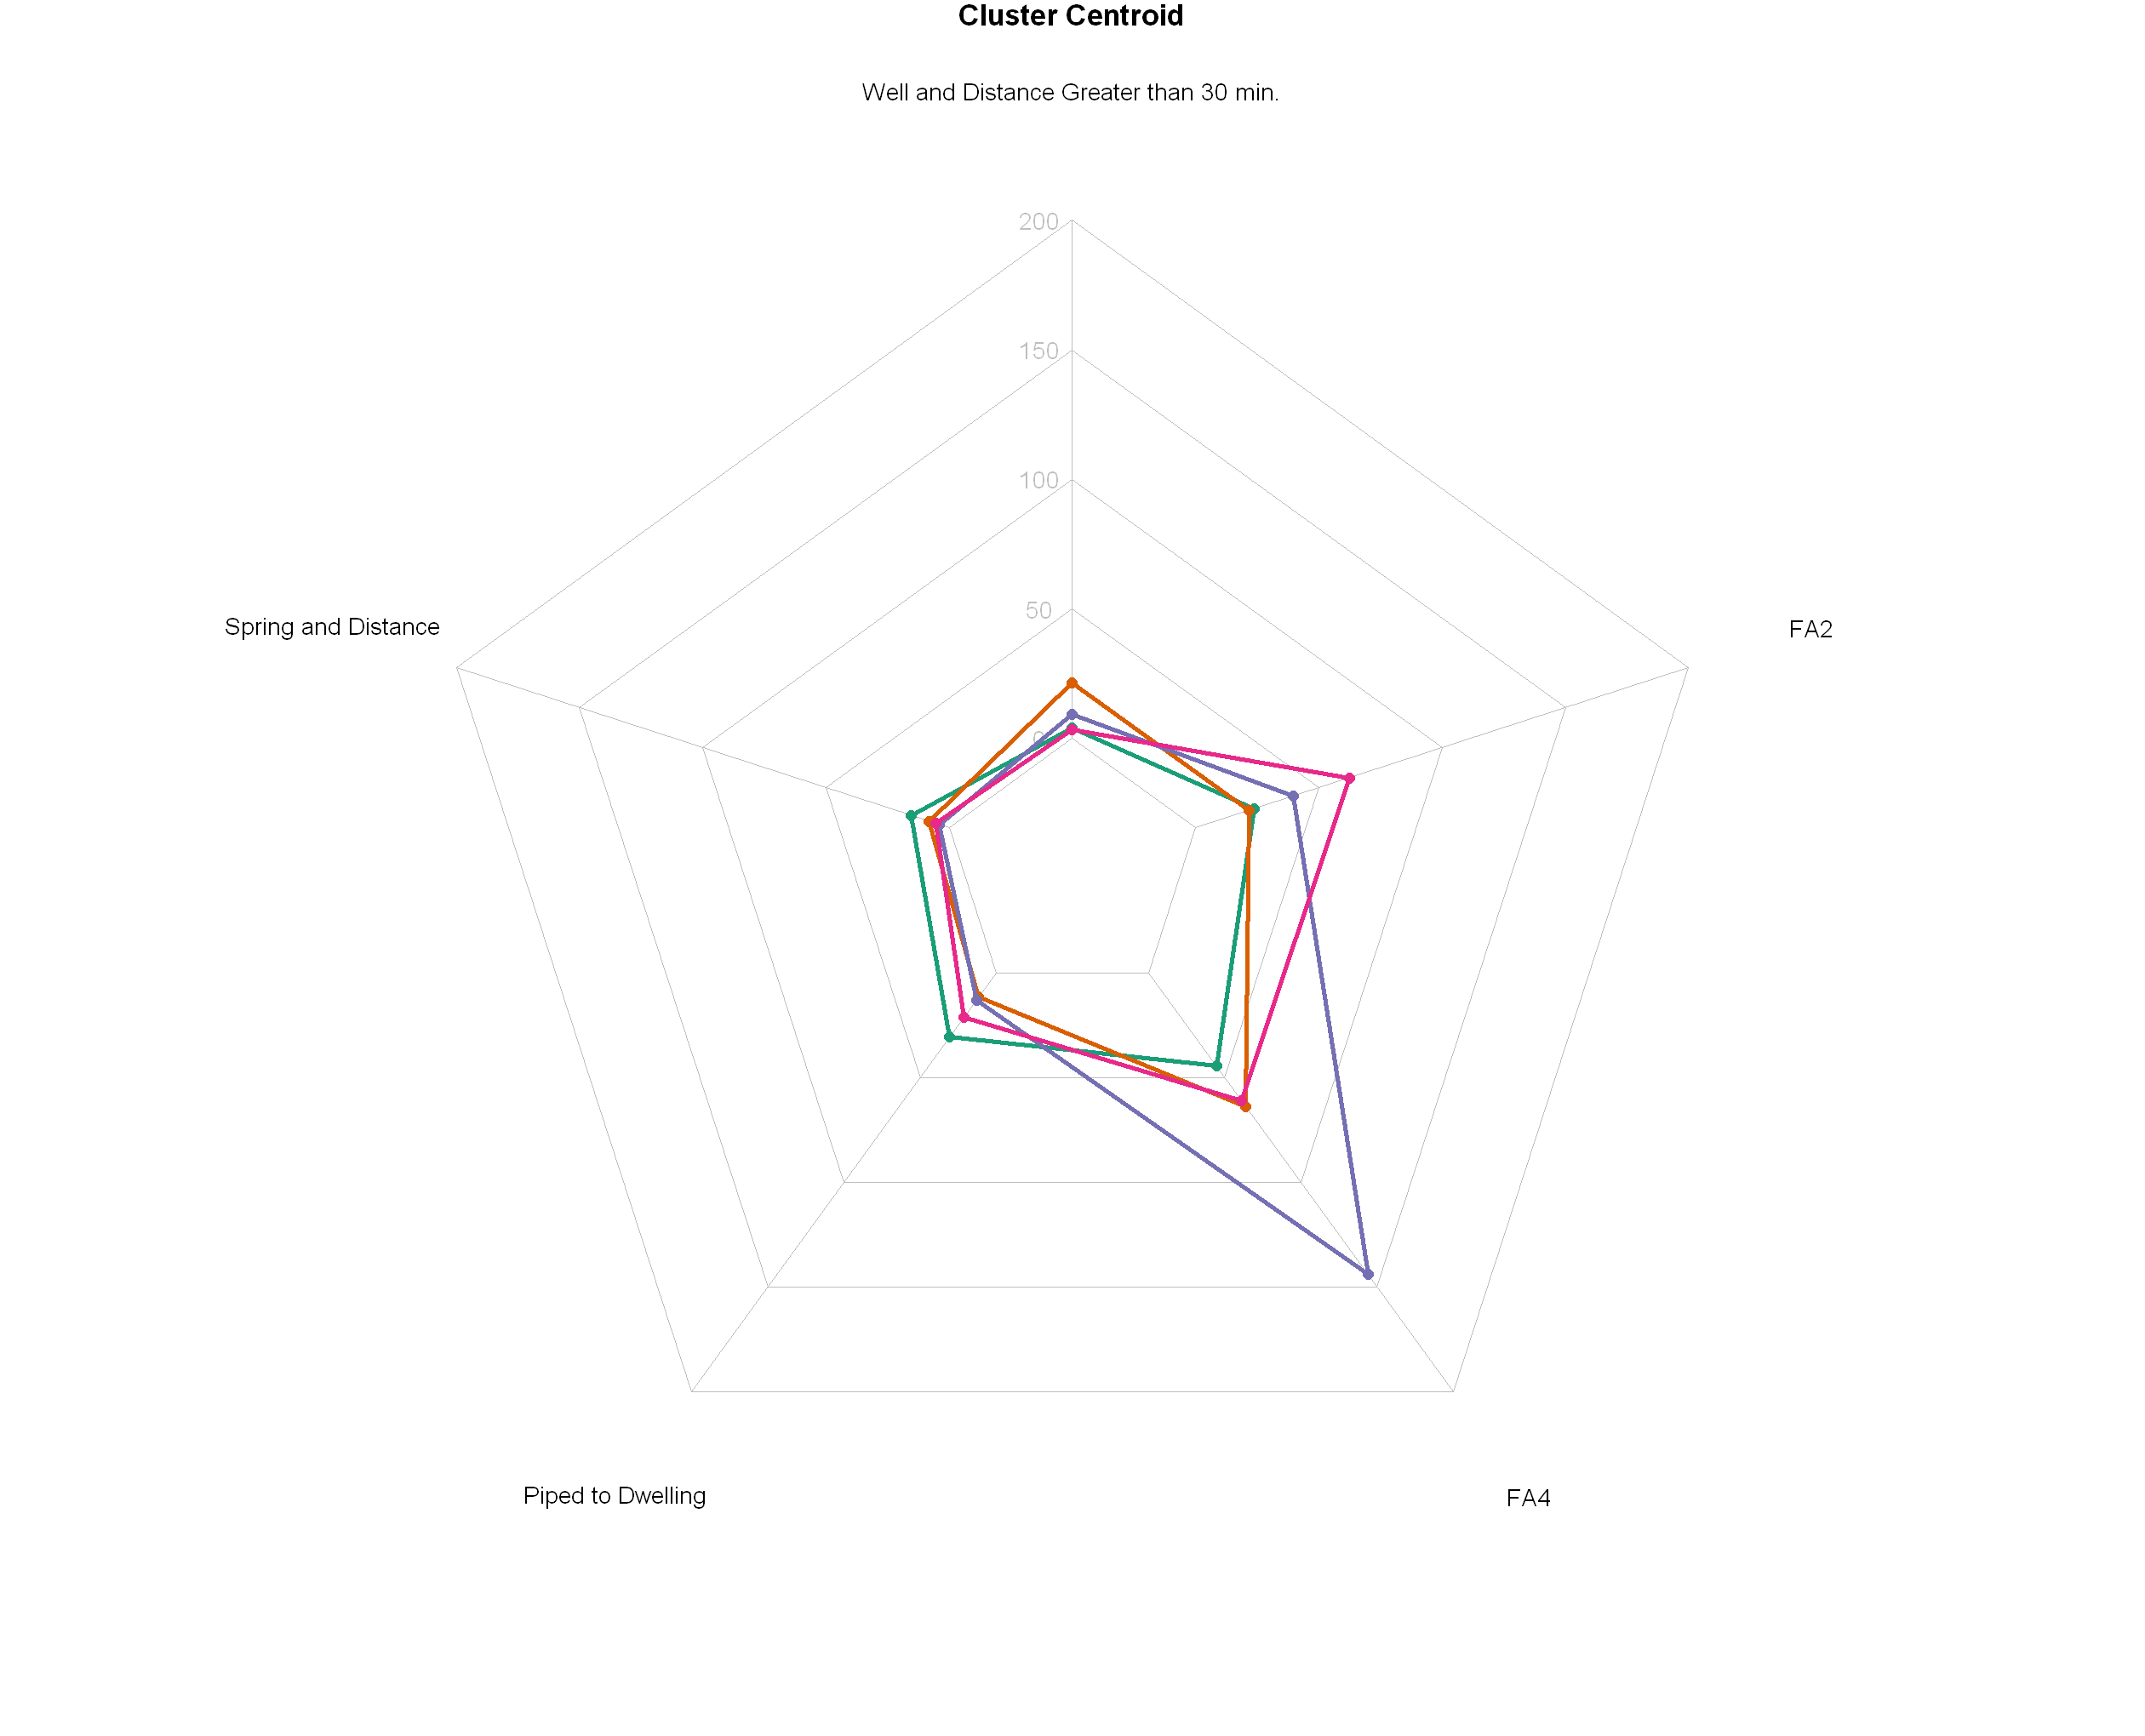

In [152]:
data.spider <- rbind(rep(200,100) , rep(0,10) , abs(df.wa.avg[,c(2:6)]))

head(data.spider,7)
colnames(data.spider) <- c(
                            
    "Well and Distance Greater than 30 min.",
"Spring and Distance",
"Piped to Dwelling",
"FA4",
"FA2")                       
options(repr.plot.width=21, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1.4)

# The default radar chart for First Cluster
r.c. <- radarchart(data.spider,
           #custom polygon
           pcol= c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A") ,
           plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,200,50), cglwd=0.8, axistype = 4,
           title = 'Cluster Centroid',
           vlcex=1,
           calcex = 1 ,
                   
           )

# Box Plot of Water Accessibility Variables (Violin Plots)

well.tmor,spring.time,yard.ptap,FA4,FA2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.151039,15.328826,30.51925,-44.51718,-23.59719
-21.547127,-8.252406,11.50414,-63.73637,-21.54798
-9.205853,-3.987128,13.01055,-143.96996,-39.49582
3.212022,5.530914,21.42849,-60.98306,-62.41122


[1] "factor" "factor" "factor" "factor" "factor"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"position_dodge requires non-overlapping x intervals"


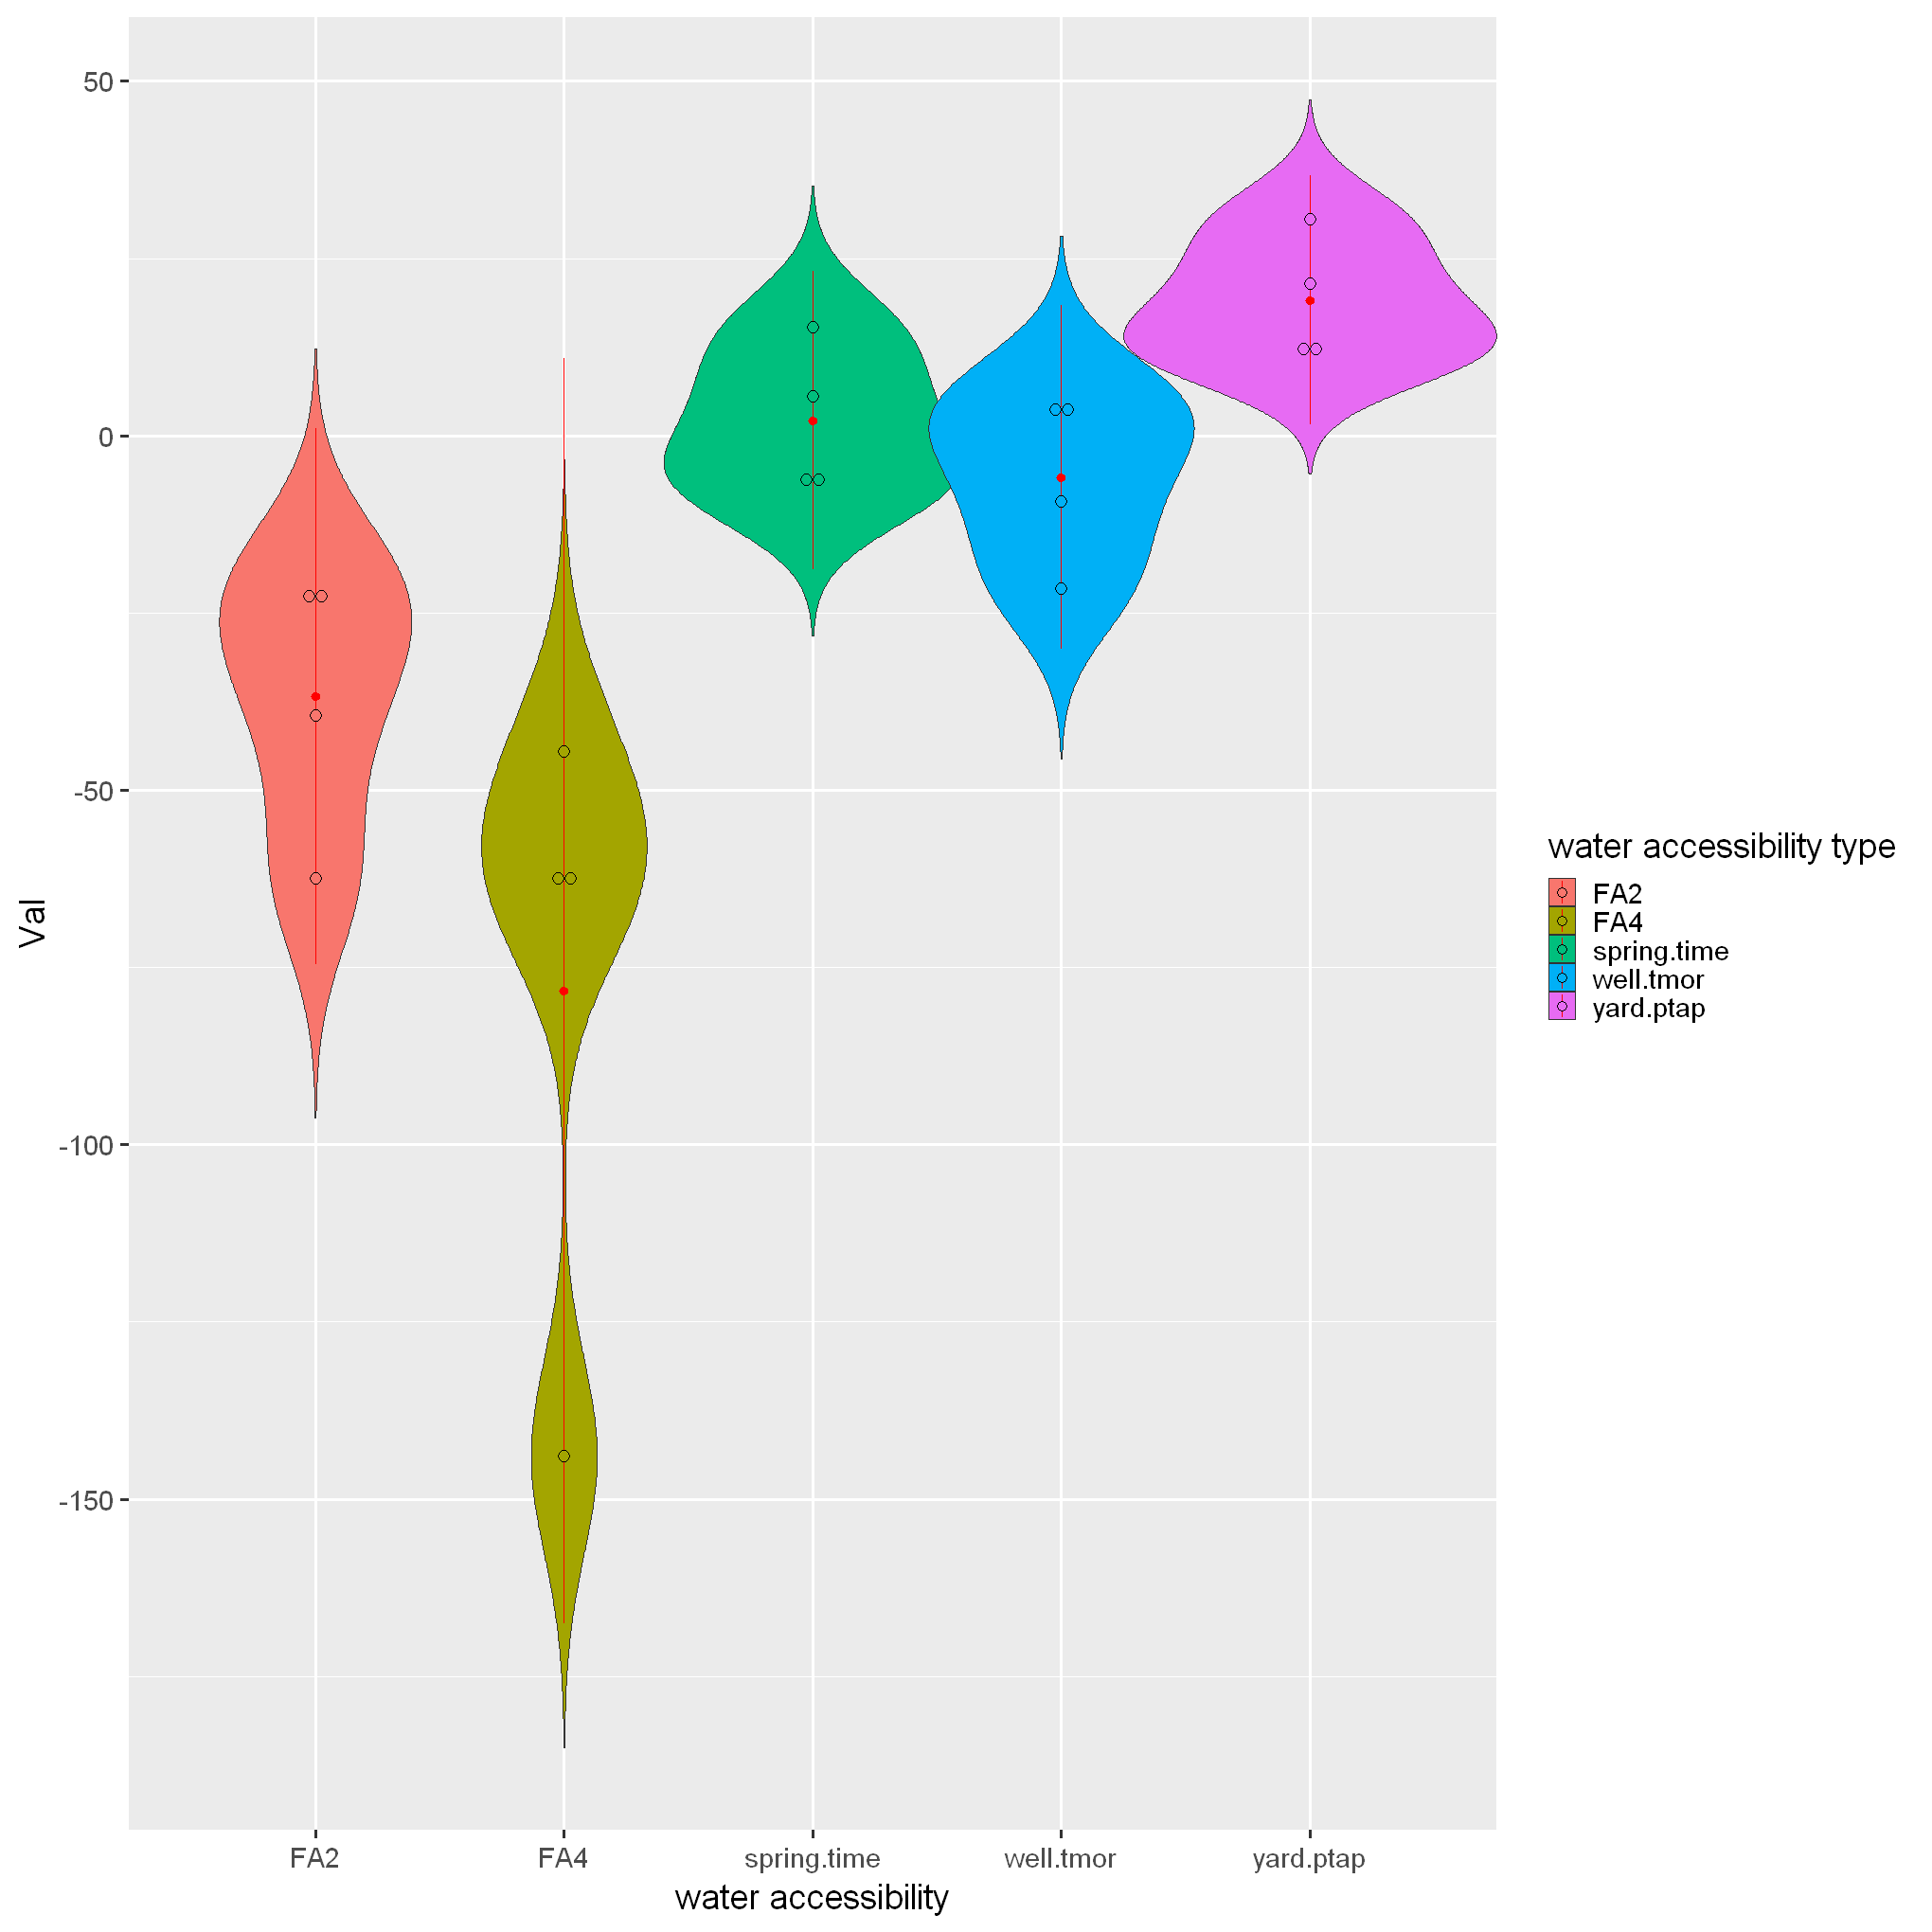

In [153]:
df.wa.aggregate <- aggregate(df, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:6]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C','D')

data_wa_one <- df.wa.aggregate[  ,1:5]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, width=1.5, size=.3) + 
    
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 




# Facet Graphs 

well.tmor,spring.time,yard.ptap,FA4,FA2,clusters
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.484293,7.76625412,21.42338294,-37.17840,-34.38031,1
-15.287720,-2.04398995,10.35337285,-105.27108,-29.99453,2
3.793724,11.70155786,24.13845364,-34.53732,-11.63272,1
-21.628625,-9.91042493,14.18582753,-158.07442,-34.76002,3
-17.760454,-5.23246268,18.21675911,-79.51994,-29.12578,2
-19.770676,-14.14505462,7.17200125,-63.22687,-115.04561,4
6.163599,6.27454576,24.64407948,-47.97183,-48.23138,4
-28.897087,-19.06916589,26.76888535,-62.40363,-16.98012,2
12.384974,10.72341939,30.62028035,-64.33100,-69.81765,4



 1  2  3  4 
23 24  6 20 

clusters,well.tmor,spring.time,yard.ptap,FA4,FA2
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.151039,15.328826,30.51925,-44.51718,-23.59719
2,-21.547127,-8.252406,11.50414,-63.73637,-21.54798
3,-9.205853,-3.987128,13.01055,-143.96996,-39.49582
4,3.212022,5.530914,21.42849,-60.98306,-62.41122


clusters   well.tmor spring.time   yard.ptap         FA4         FA2 
   "factor"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric"

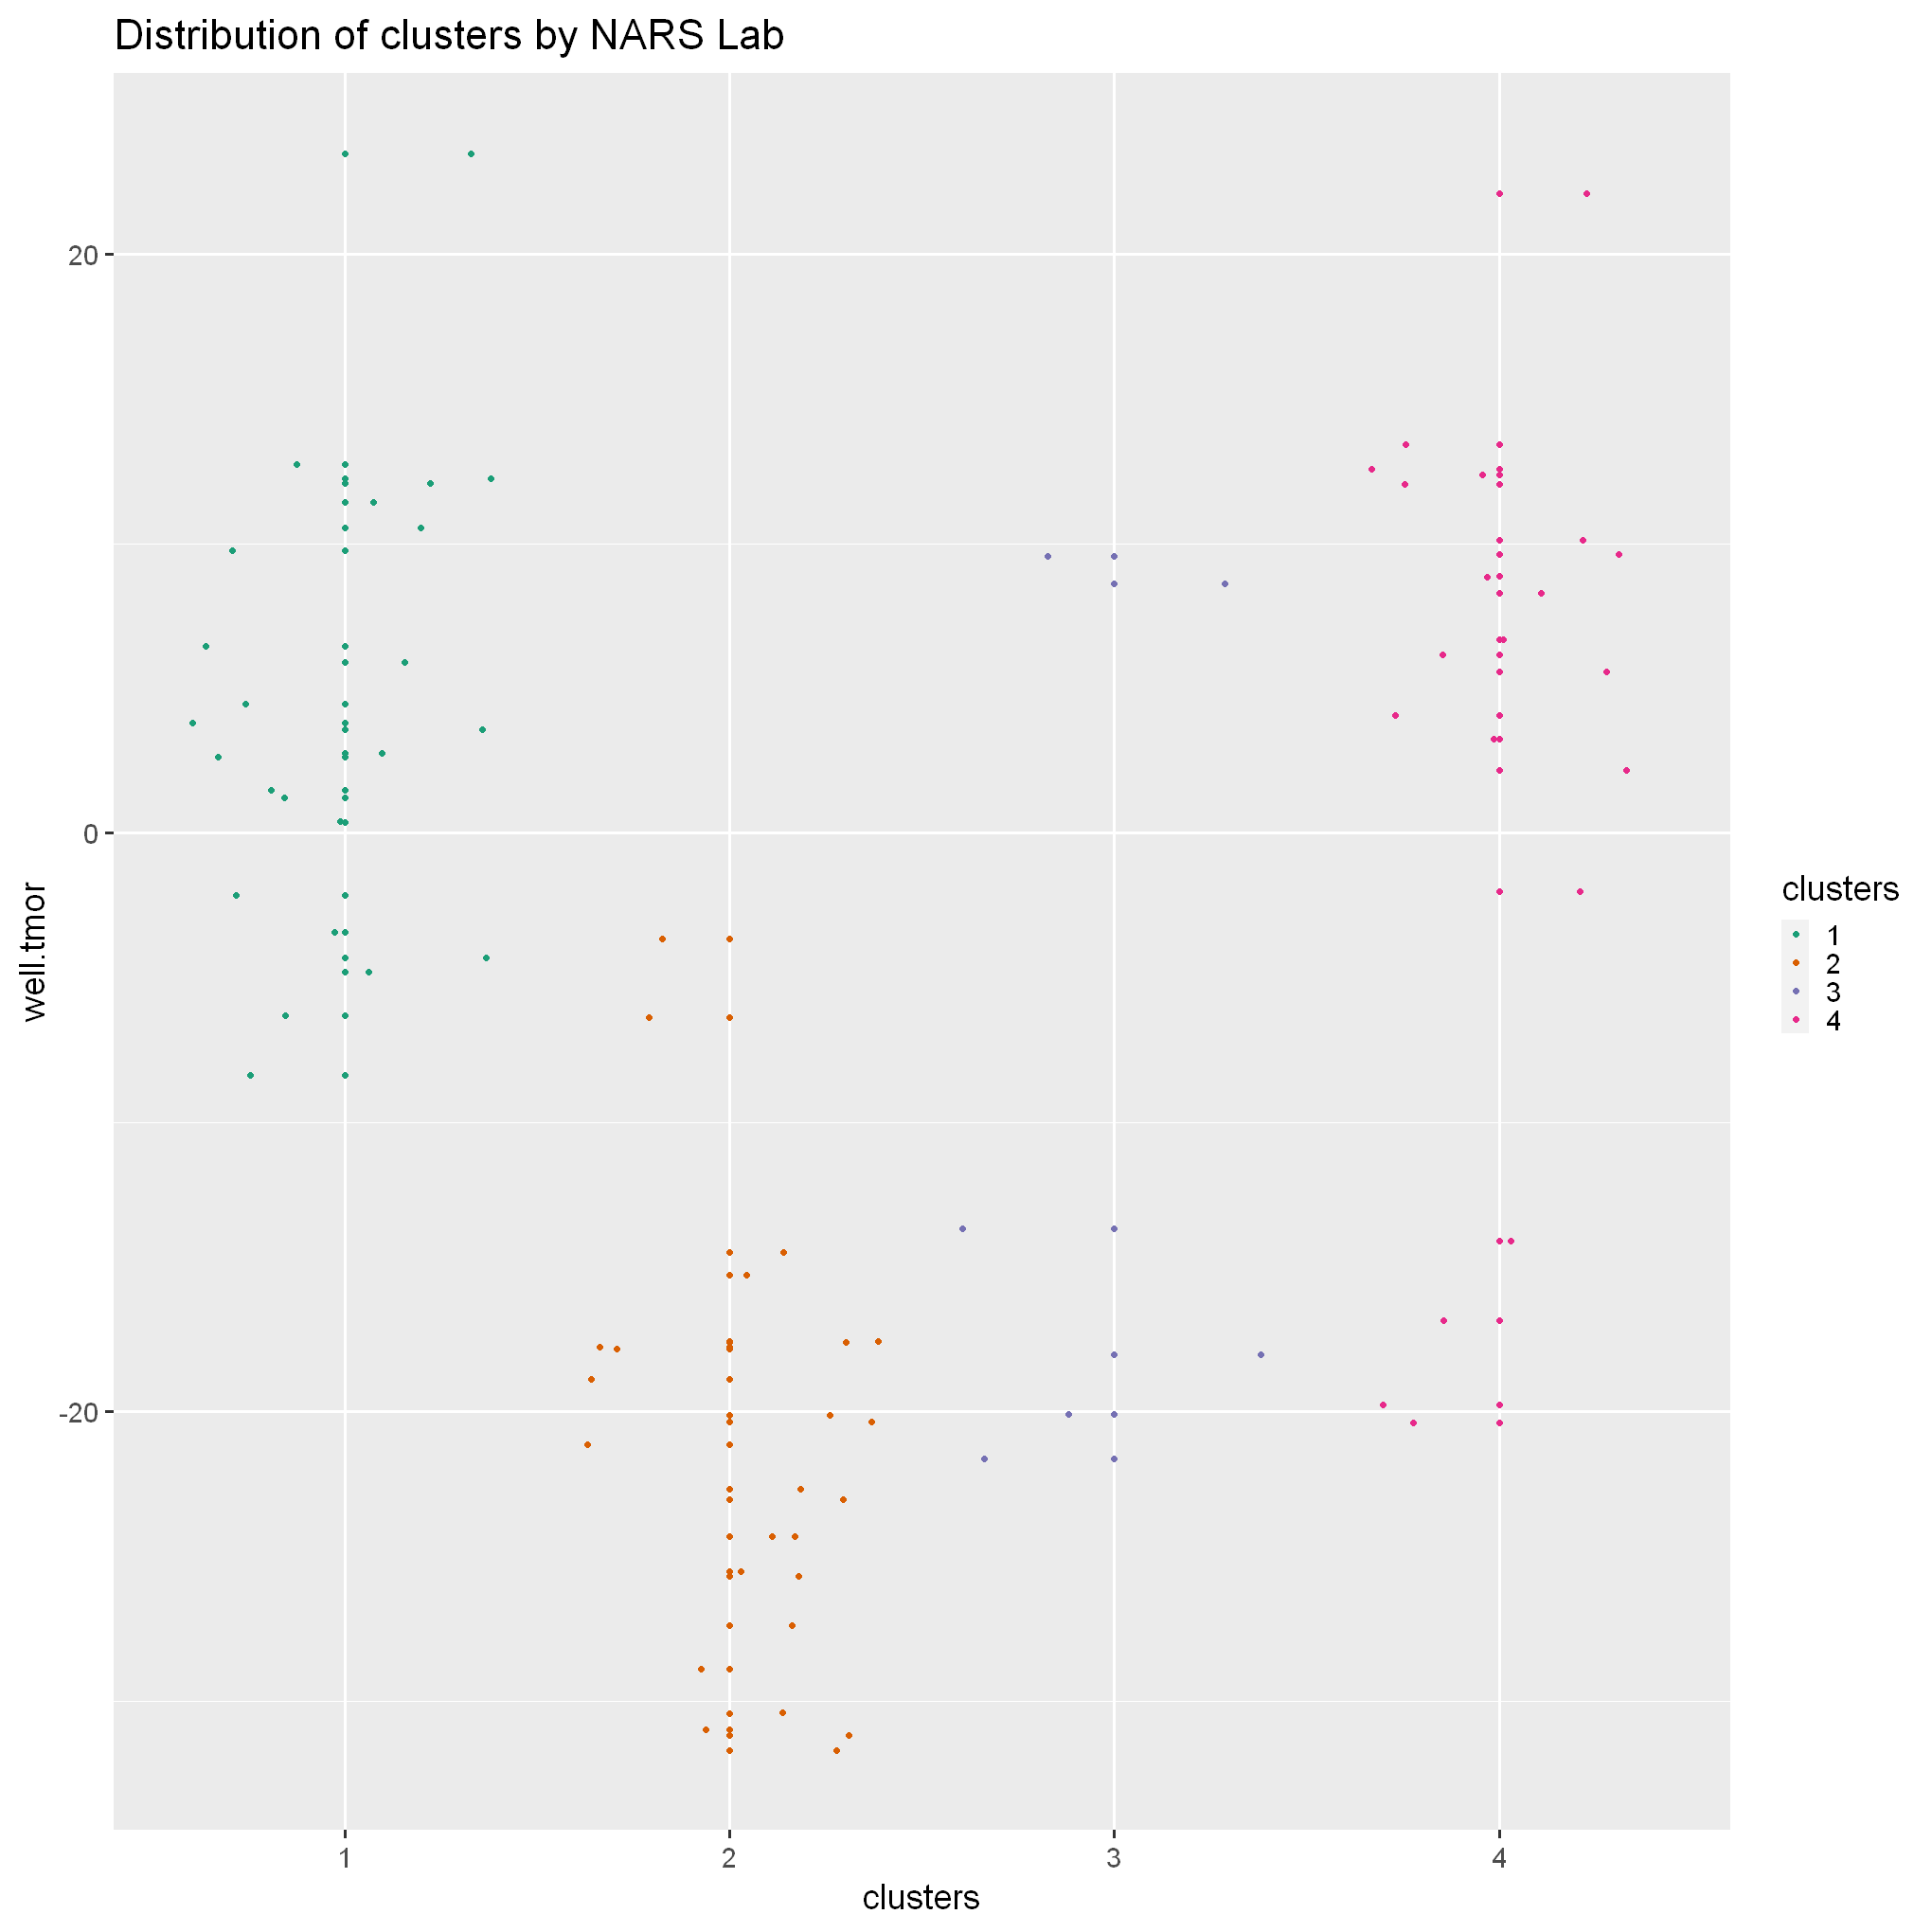

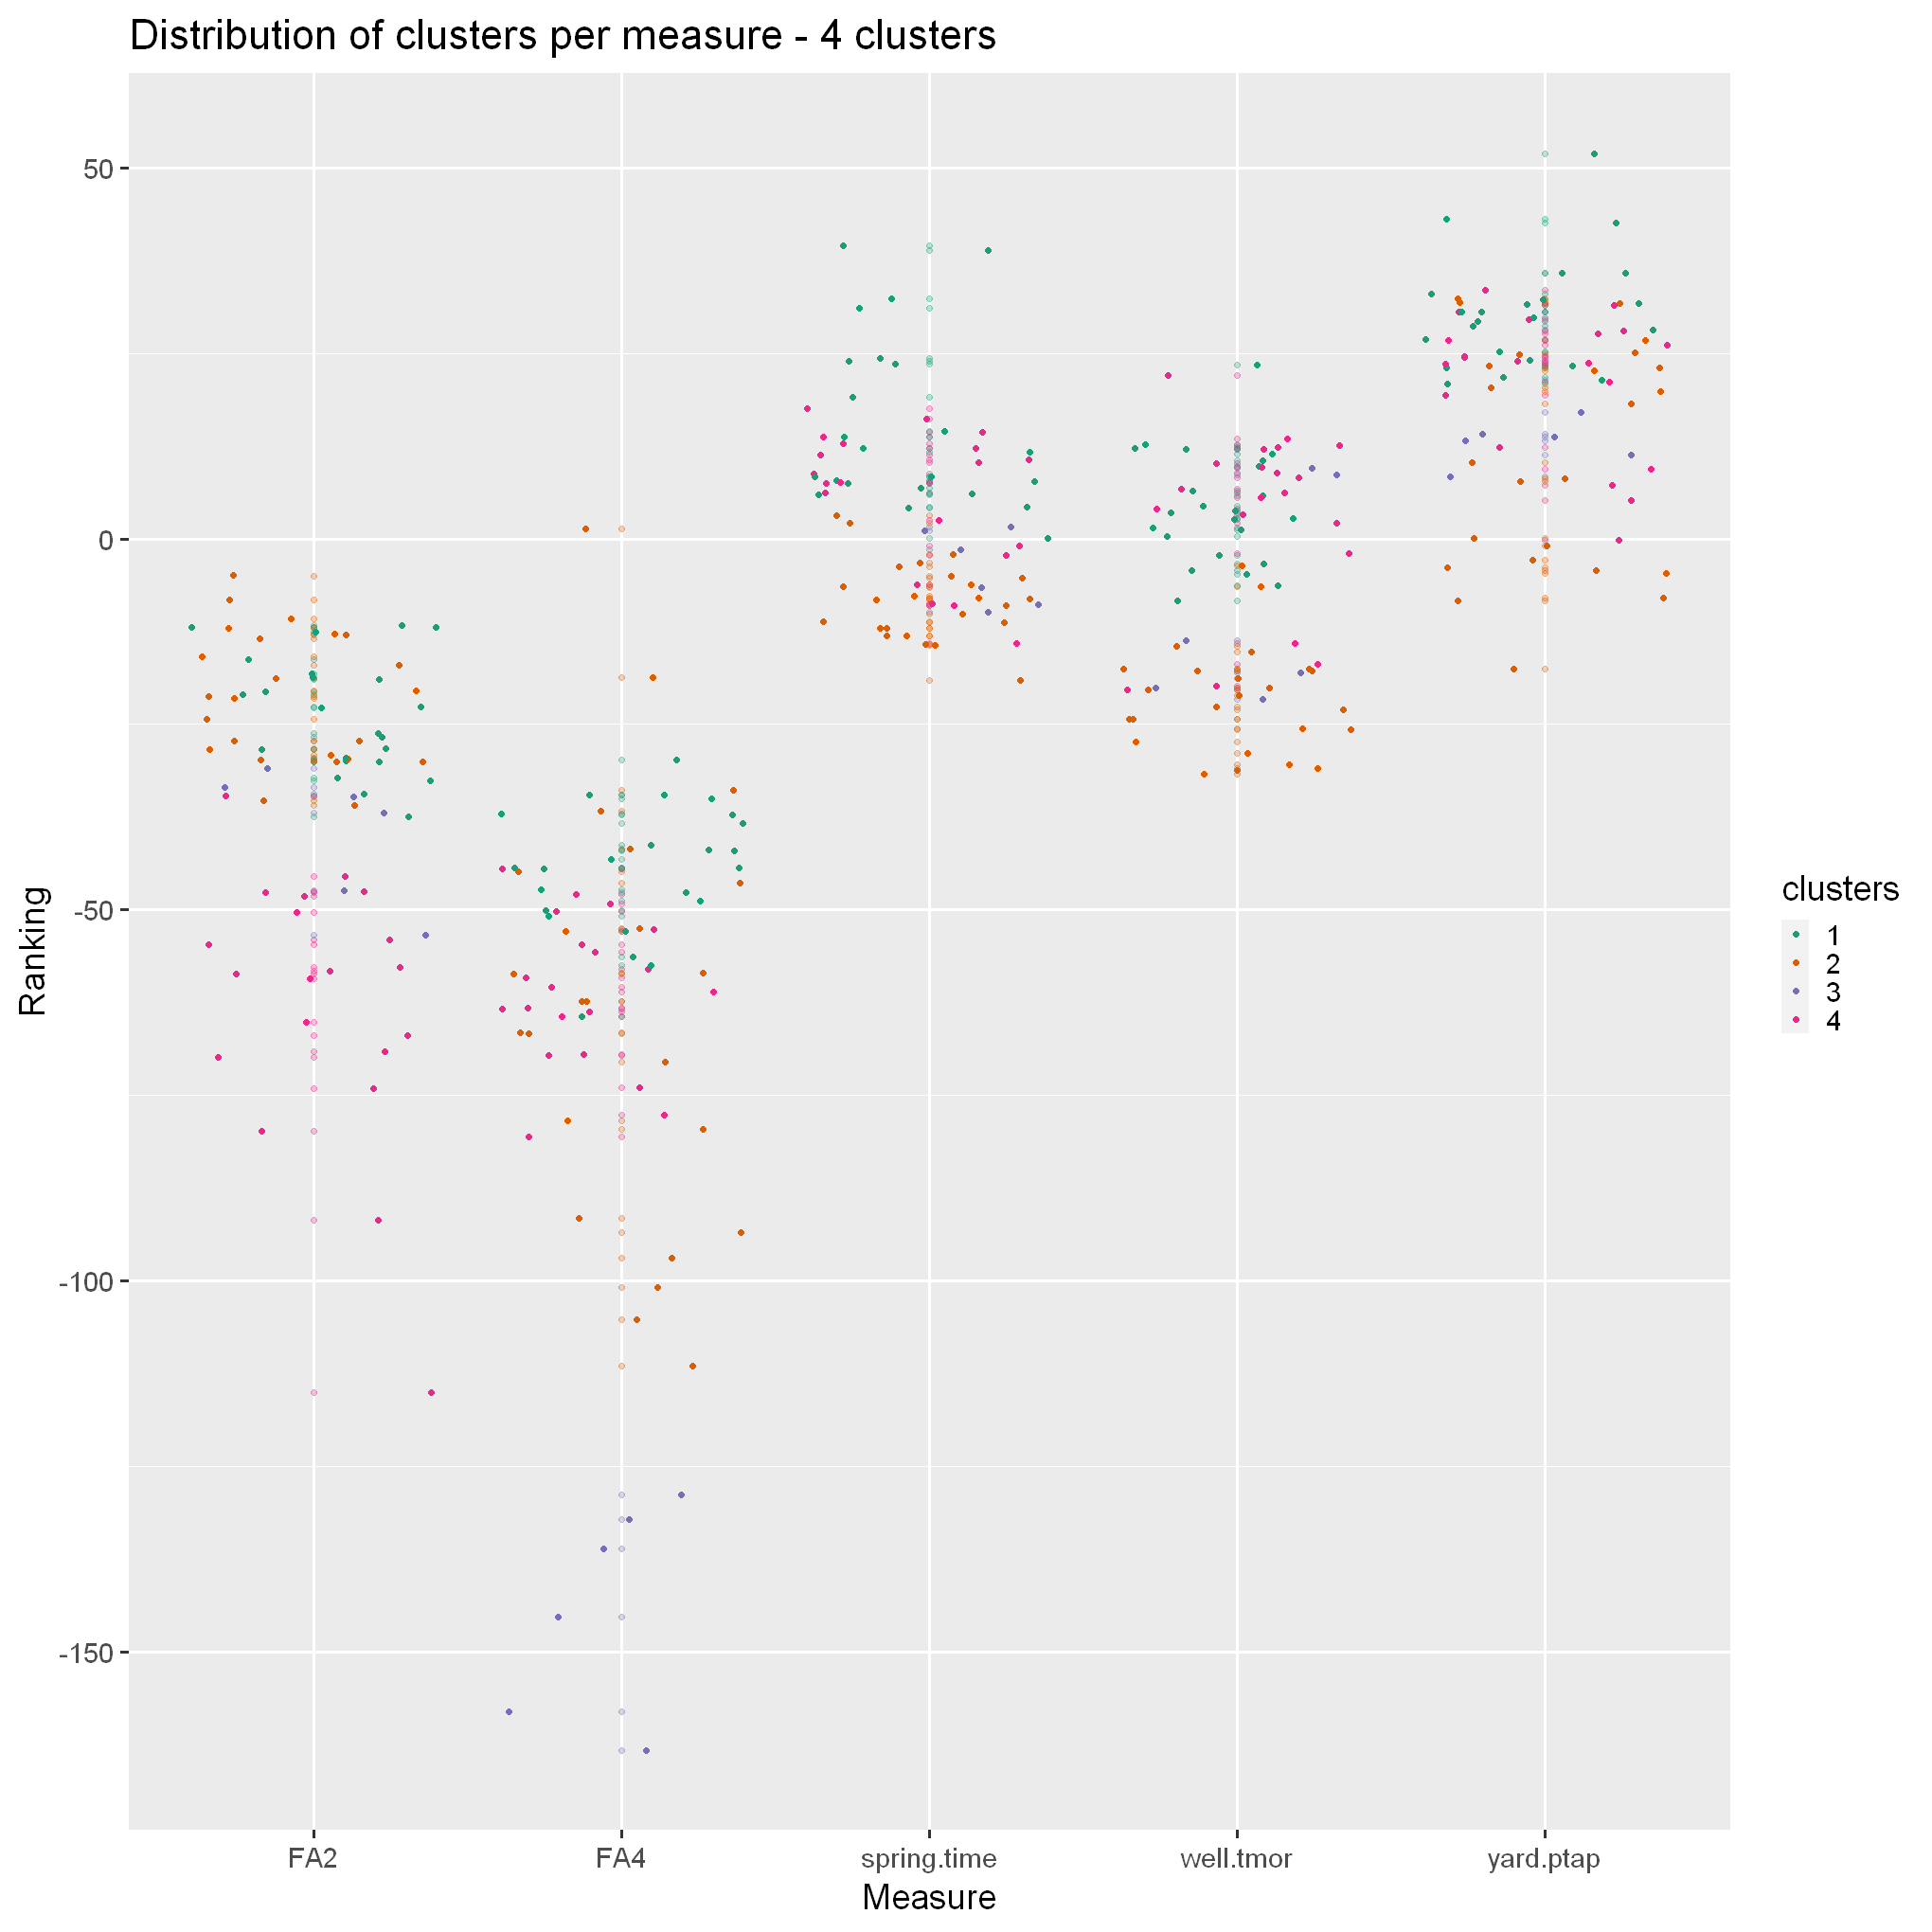

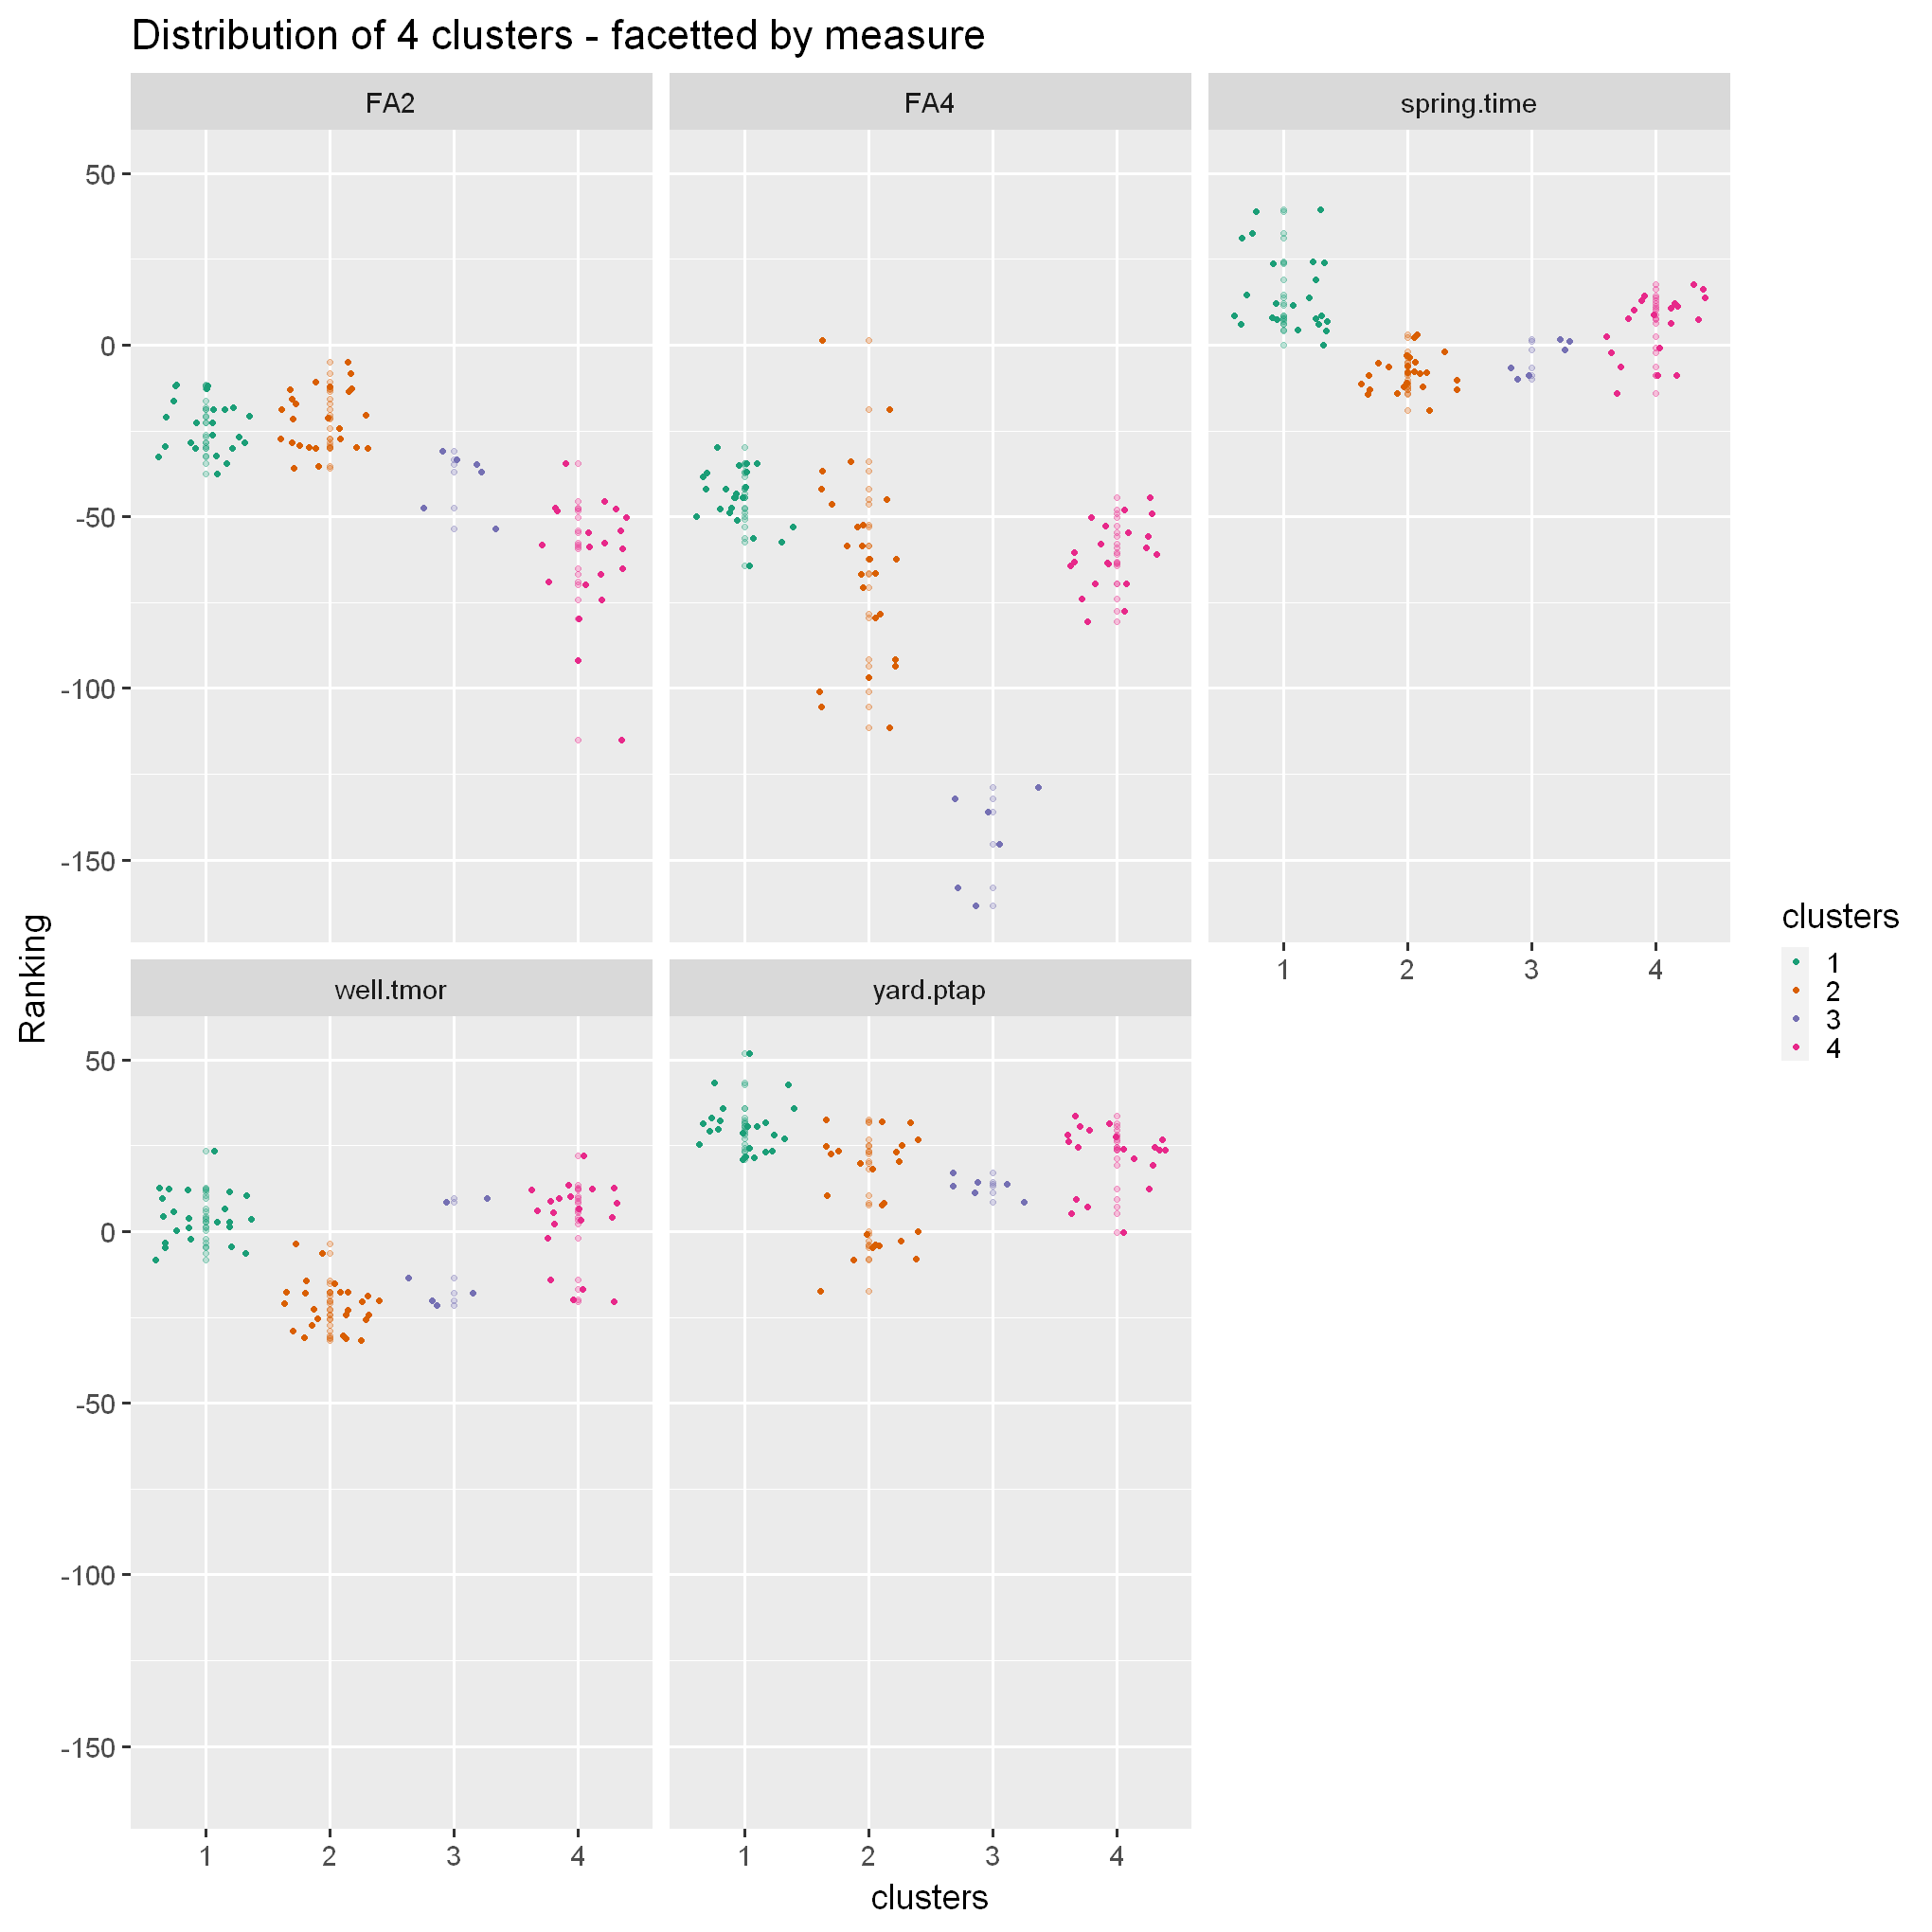

In [162]:
#data_wa$cluster <- cutree(hc.ward2,4) 
df
hc.ward2=hclust(dist(df), method ="ward.D2")
df$clusters <- cutree(hc.ward2,4)
df$clusters <- as.factor(df$clusters)

p <- ggplot(df, aes(clusters, well.tmor, color = clusters, fill = clusters)) +
  geom_point(alpha = 0.6) +
  geom_jitter() +
  geom_point() +
  ggtitle("Distribution of clusters by NARS Lab") +
  scale_color_manual(values=c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A") )
p <- p + theme_grey(base_size = 22) 
p

table(df$clusters)

#Group by the cluster assignment and calculate averages
df4_clus_avg <- df %>%
  group_by(clusters) %>%
  summarize_if(is.numeric, mean, na.rm=TRUE)


head(df4_clus_avg,7) 

sapply(df4_clus_avg, class)
#Create a parallel coordinate plot of the values:
ggparcoord <- ggparcoord(df4_clus_avg, columns = c(2:6), 
           groupColumn = "clusters", scale = "globalminmax", order = "skewness") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + geom_point(color = "#00AFBB") 
    
#make a dot plot
countries4_gathered <- df %>% gather(Measure, Ranking, well.tmor:FA2) 

g <- ggplot(countries4_gathered, aes(Measure, Ranking, color = clusters )) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of clusters per measure - 4 clusters") 
   
g <- g + theme_grey(base_size = 22) +  scale_color_manual(values=c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A")) 
g 
countries4_gathered %>% 

ggplot(aes(clusters, Ranking, col = clusters)) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of 4 clusters - facetted by measure") +
  facet_wrap(~Measure) +
 theme_grey(base_size = 22) +  
scale_color_manual(values=c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A"))
# set the set factor as for the clusters


# Ranking

In [164]:
df.wa <- read_excel("../../results/df-wa-fa.xlsx",sheet=1)
df.wa <- df.wa %>% 
  rename(
    yard.ptap = PA1,
    spring.time = PA3,
    FA2 = PA2,
    FA4  = PA4,
    well.tmor = PA5
      
    )

In [165]:
head(df.wa,7) # clean df at next save (2 cluster columns - only 1 needed; etc) #df also needs to be only water accessibility variables

Country,well.tmor,spring.time,yard.ptap,FA4,FA2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1.484293,7.766254,21.423383,-37.17840,-34.38031
Albania,-15.287720,-2.043990,10.353373,-105.27108,-29.99453
Angola,3.793724,11.701558,24.138454,-34.53732,-11.63272
Armenia,-21.628625,-9.910425,14.185828,-158.07442,-34.76002
Azerbaijan,-17.760454,-5.232463,18.216759,-79.51994,-29.12578
Bangladesh,-19.770676,-14.145055,7.172001,-63.22687,-115.04561
Benin,6.163599,6.274546,24.644079,-47.97183,-48.23138


In [166]:
df.wa["norm"] <- apply(df.wa[2:6], 1, function(x) sqrt(sum(x^2)) ) #assuming columns 5:10 are the water accessibility variables
# Ideally, df should just be the countries and the water access. variables ONLY. This, way, the code should then be:
# df["norm"] <- apply(df, 1, function(x) sqrt(sum(x^2)) )

In [167]:
df.wa["distToCentroid"] = 0 # initialize

In [168]:
df.wa$clusters <- as.numeric(df$clusters)
head(df.wa)
#Turn into numeric to find centroids

Country,well.tmor,spring.time,yard.ptap,FA4,FA2,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1.484293,7.766254,21.423383,-37.17840,-34.38031,55.54924,0,1
Albania,-15.287720,-2.043990,10.353373,-105.27108,-29.99453,111.02593,0,2
Angola,3.793724,11.701558,24.138454,-34.53732,-11.63272,45.41069,0,1
Armenia,-21.628625,-9.910425,14.185828,-158.07442,-34.76002,164.20424,0,3
Azerbaijan,-17.760454,-5.232463,18.216759,-79.51994,-29.12578,88.57988,0,2
Bangladesh,-19.770676,-14.145055,7.172001,-63.22687,-115.04561,133.69940,0,4


In [169]:
head(df.wa)

Country,well.tmor,spring.time,yard.ptap,FA4,FA2,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1.484293,7.766254,21.423383,-37.17840,-34.38031,55.54924,0,1
Albania,-15.287720,-2.043990,10.353373,-105.27108,-29.99453,111.02593,0,2
Angola,3.793724,11.701558,24.138454,-34.53732,-11.63272,45.41069,0,1
Armenia,-21.628625,-9.910425,14.185828,-158.07442,-34.76002,164.20424,0,3
Azerbaijan,-17.760454,-5.232463,18.216759,-79.51994,-29.12578,88.57988,0,2
Bangladesh,-19.770676,-14.145055,7.172001,-63.22687,-115.04561,133.69940,0,4


In [170]:
# assuming centroiddf.wa is your vector of cluster centroids

# copied this from your earlier notebook
df.wa.aggregate <- aggregate(df.wa[,c(2:6)], list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,c(1:6)]
centroiddf.wa <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster

head(centroiddf.wa)       
                       
                       
df.wa$clusters <- dfsimple$clusters                      
head(df.wa,7)
                       df <- df.wa

[1]  61.01833  72.07889 150.22046  90.16753

Country,well.tmor,spring.time,yard.ptap,FA4,FA2,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1.484293,7.766254,21.423383,-37.17840,-34.38031,55.54924,0,1
Albania,-15.287720,-2.043990,10.353373,-105.27108,-29.99453,111.02593,0,2
Angola,3.793724,11.701558,24.138454,-34.53732,-11.63272,45.41069,0,1
Armenia,-21.628625,-9.910425,14.185828,-158.07442,-34.76002,164.20424,0,3
Azerbaijan,-17.760454,-5.232463,18.216759,-79.51994,-29.12578,88.57988,0,2
Bangladesh,-19.770676,-14.145055,7.172001,-63.22687,-115.04561,133.69940,0,4
Benin,6.163599,6.274546,24.644079,-47.97183,-48.23138,72.88520,0,4


In [171]:
# Then here, you compute the distance to centroid cluster by cluster
df[df$clusters == 1, "distToCentroid"] = abs(df[df$clusters == 1, "norm"] - centroiddf.wa[1])
df[df$clusters == 2, "distToCentroid"] = abs(df[df$clusters == 2, "norm"] - centroiddf.wa[2])
df[df$clusters == 3, "distToCentroid"] = abs(df[df$clusters == 3, "norm"] - centroiddf.wa[3])
df[df$clusters == 4, "distToCentroid"] = abs(df[df$clusters == 4, "norm"] - centroiddf.wa[4])
df[df$clusters == 5, "distToCentroid"] = abs(df[df$clusters == 5, "norm"] - centroiddf.wa[4])
                       

head(df)
write_xlsx(df , '../../results/df-fa-cluster-rank.xlsx')

Country,well.tmor,spring.time,yard.ptap,FA4,FA2,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1.484293,7.766254,21.423383,-37.17840,-34.38031,55.54924,5.469083,1
Albania,-15.287720,-2.043990,10.353373,-105.27108,-29.99453,111.02593,38.947044,2
Angola,3.793724,11.701558,24.138454,-34.53732,-11.63272,45.41069,15.607642,1
Armenia,-21.628625,-9.910425,14.185828,-158.07442,-34.76002,164.20424,13.983774,3
Azerbaijan,-17.760454,-5.232463,18.216759,-79.51994,-29.12578,88.57988,16.500991,2
Bangladesh,-19.770676,-14.145055,7.172001,-63.22687,-115.04561,133.69940,43.531872,4


In [172]:
# You can then sort each subset by the size of "distToCentroid"
df %>% 
  arrange_at("Country", desc) %>%
  arrange_at("distToCentroid") %>%
  select(1, 8, 9)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Eritrea,0.6104551,1
Colombia,0.7528826,3
Kenya,0.8129012,1
Chad,1.0774521,4
Congo,1.2071183,1
Moldova,1.2172455,4
Zimbabwe,1.8566343,4
Haiti,1.9483633,1
Senegal,3.1317836,2


In [173]:
# You can then sort each subset by the size of "distToCentroid"
df1 = df %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1, 8, 9)


In [175]:
head(df1)
cluster.one <- subset(df1, clusters == 1 )
cluster.two <- subset(df1, clusters == 2 )
cluster.three <- subset(df1, clusters == 3 )
cluster.four <- subset(df1, clusters == 4 )
#cluster.five <- subset(df1, clusters == 5 )
head(cluster.one)
summary(cluster.one)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Eritrea,0.6104551,1
Kenya,0.8129012,1
Congo,1.2071183,1
Haiti,1.9483633,1
Madagascar,3.6744700,1
Mozambique,5.0567847,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Eritrea,0.6104551,1
Kenya,0.8129012,1
Congo,1.2071183,1
Haiti,1.9483633,1
Madagascar,3.6744700,1
Mozambique,5.0567847,1


   Country          distToCentroid       clusters
 Length:23          Min.   : 0.6105   Min.   :1  
 Class :character   1st Qu.: 5.1701   1st Qu.:1  
 Mode  :character   Median : 7.3748   Median :1  
                    Mean   : 8.3088   Mean   :1  
                    3rd Qu.:12.7547   3rd Qu.:1  
                    Max.   :16.9874   Max.   :1  

In [176]:
cluster.one %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.two %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.three %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.four %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
   arrange_at("clusters") %>%
 select(1:3)
cluster.five %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
   arrange_at("clusters") %>%
 select(1:3)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Eritrea,0.6104551,1
Kenya,0.8129012,1
Congo,1.2071183,1
Haiti,1.9483633,1
Madagascar,3.6744700,1
Mozambique,5.0567847,1
Rwanda,5.2834176,1
Sierra Leone,5.2991097,1
Ethiopia,5.3206898,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Senegal,3.131784,2
Nicaragua,3.172634,2
Philippines,3.869641,2
Timor-Leste,5.051845,2
Bolivia,6.009428,2
Tajikistan,6.436636,2
Guatemala,6.749489,2
Turkmenistan,9.198065,2
Gabon,10.474328,2


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Colombia,0.7528826,3
Ukraine,6.9530149,3
Peru,8.9178149,3
Morocco,11.9605650,3
Armenia,13.9837739,3
Egypt,18.8758524,3


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Chad,1.077452,4
Moldova,1.217245,4
Zimbabwe,1.856634,4
Cambodia,3.768455,4
Cameroon,3.952777,4
Guinea,4.976773,4
Nepal,5.549336,4
Uganda,6.794145,4
Nigeria,8.582877,4


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>


# World Map

In [177]:
df = read_excel('../../results/df-fa-cluster-rank.xlsx') #change name of file to sth descriptive (e.g. country-clusters)
head(df)

Country,well.tmor,spring.time,yard.ptap,FA4,FA2,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1.484293,7.766254,21.423383,-37.17840,-34.38031,55.54924,5.469083,1
Albania,-15.287720,-2.043990,10.353373,-105.27108,-29.99453,111.02593,38.947044,2
Angola,3.793724,11.701558,24.138454,-34.53732,-11.63272,45.41069,15.607642,1
Armenia,-21.628625,-9.910425,14.185828,-158.07442,-34.76002,164.20424,13.983774,3
Azerbaijan,-17.760454,-5.232463,18.216759,-79.51994,-29.12578,88.57988,16.500991,2
Bangladesh,-19.770676,-14.145055,7.172001,-63.22687,-115.04561,133.69940,43.531872,4


In [178]:
df = df[, c(1,9)] # select only country name and cluster number
head(df,7)

Country,clusters
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,3
Azerbaijan,2
Bangladesh,4
Benin,4


In [179]:
colnames(df) = c('region', 'value') # change column names for ggplot
dim(df)
head(df)

[1] 73  2

region,value
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,3
Azerbaijan,2
Bangladesh,4


In [180]:
# This is to convert country names in df to match those in the worldMap dataframe
coords <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "region")
coords = data.frame(coords)
colnames(coords) = tolower(colnames(coords))
colnames(coords)
coords = drop_na(coords, value)
coords$name

71 codes from your data successfully matched countries in the map
2 codes from your data failed to match with a country code in the map
172 codes from the map weren't represented in your data


[1] "scalerank"    "labelrank"    "featurecla"   "sovereignt"   "sov_a3"      
 [6] "adm0_dif"     "level"        "type"         "admin"        "adm0_a3"     
[11] "geou_dif"     "geounit"      "gu_a3"        "su_dif"       "subunit"     
[16] "su_a3"        "name"         "abbrev"       "postal"       "name_forma"  
[21] "terr_"        "name_sort"    "map_color"    "pop_est"      "gdp_md_est"  
[26] "fips_10_"     "iso_a2"       "iso_a3"       "iso_n3"       "iso3"        
[31] "lon"          "lat"          "iso3.1"       "admin.1"      "region"      
[36] "continent"    "geo3major"    "geo3"         "image24"      "glocaf"      
[41] "stern"        "sresmajor"    "sres"         "gbd"          "avoidnumeric"
[46] "avoidname"    "ldc"          "sid"          "lldc"         "region"      
[51] "value"        "admin.2"      "iso3.2"

[1] Afghanistan           Angola                Albania              
 [4] Armenia               Azerbaijan            Burundi              
 [7] Benin                 Burkina Faso          Bangladesh           
[10] Bolivia               Ivory Coast           Cameroon             
[13] Congo (Brazzaville)   Colombia              Dominican Rep.       
[16] Egypt                 Eritrea               Ethiopia             
[19] Gabon                 Ghana                 Guinea               
[22] Gambia                Guatemala             Guyana               
[25] Honduras              Haiti                 Indonesia            
[28] India                 Jordan                Kenya                
[31] Kyrgyzstan            Cambodia              Liberia              
[34] Lesotho               Morocco               Moldova              
[37] Madagascar            Mali                  Myanmar              
[40] Mozambique            Mauritania            Malawi               
[43] Namibia               Niger                 Nigeria              
[46] Nicaragua             Nepal                 Pakistan             
[49] Peru                  Philippines           Papua New Guinea     
[52] Rwanda                Senegal               Sierra Leone         
[55] Chad                  Togo                  Tajikistan           
[58] Turkmenistan          East Timor            Turkey               
[61] Tanzania              Uganda                Ukraine              
[64] Vietnam               Yemen                 South Africa         
[67] Zambia                Zimbabwe              Comoros              
[70] Maldives              Sao Tome and Principe
243 Levels: Afghanistan Aland Albania Algeria American Samoa Andorra ... Zimbabwe

In [181]:
setdiff(df$region,coords$name)

[1] "Congo"                     "Congo Democratic Republic"
[3] "Cote d'Ivoire"             "Dominican Republic"       
[5] "Eswatini"                  "Kyrgyz Republic"          
[7] "Timor-Leste"

In [182]:
# Correct the country names in DF
df[df=='Timor-Leste'] = "East Timor"
df[df=='Central African Republic'] = "Central African Rep."
df[df=='Cote d\'Ivoire'] = "Ivory Coast"
df[df=='Dominican Republic'] = "Dominican Rep."
df[df=='Kyrgyz Republic'] = "Kyrgyzstan"
df[df=='Eswatini'] = "Swaziland"
df[df=='Congo'] = "Congo (Brazzaville)"
df[df=='Congo Democratic Republic'] = "Congo (Kinshasa)"

In [183]:
# Get world map data (lat/long)
countrynames = df$region
worldMap <- getMap()
country_indices <- which(worldMap$NAME%in%countrynames)

In [184]:
# Get coordinates for all countries to plot base map
allCoords <- lapply(seq(1,243), function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})
allCoords <- do.call("rbind", allCoords)


In [185]:
# Get coordinates strictly for those in water accessibility dataset
waterCoords <- lapply(country_indices, function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})

waterCoords <- do.call("rbind", waterCoords)
waterCoords$value <- df$value[match(waterCoords$region,df$region)]
waterCoords$value <- factor(waterCoords$value)

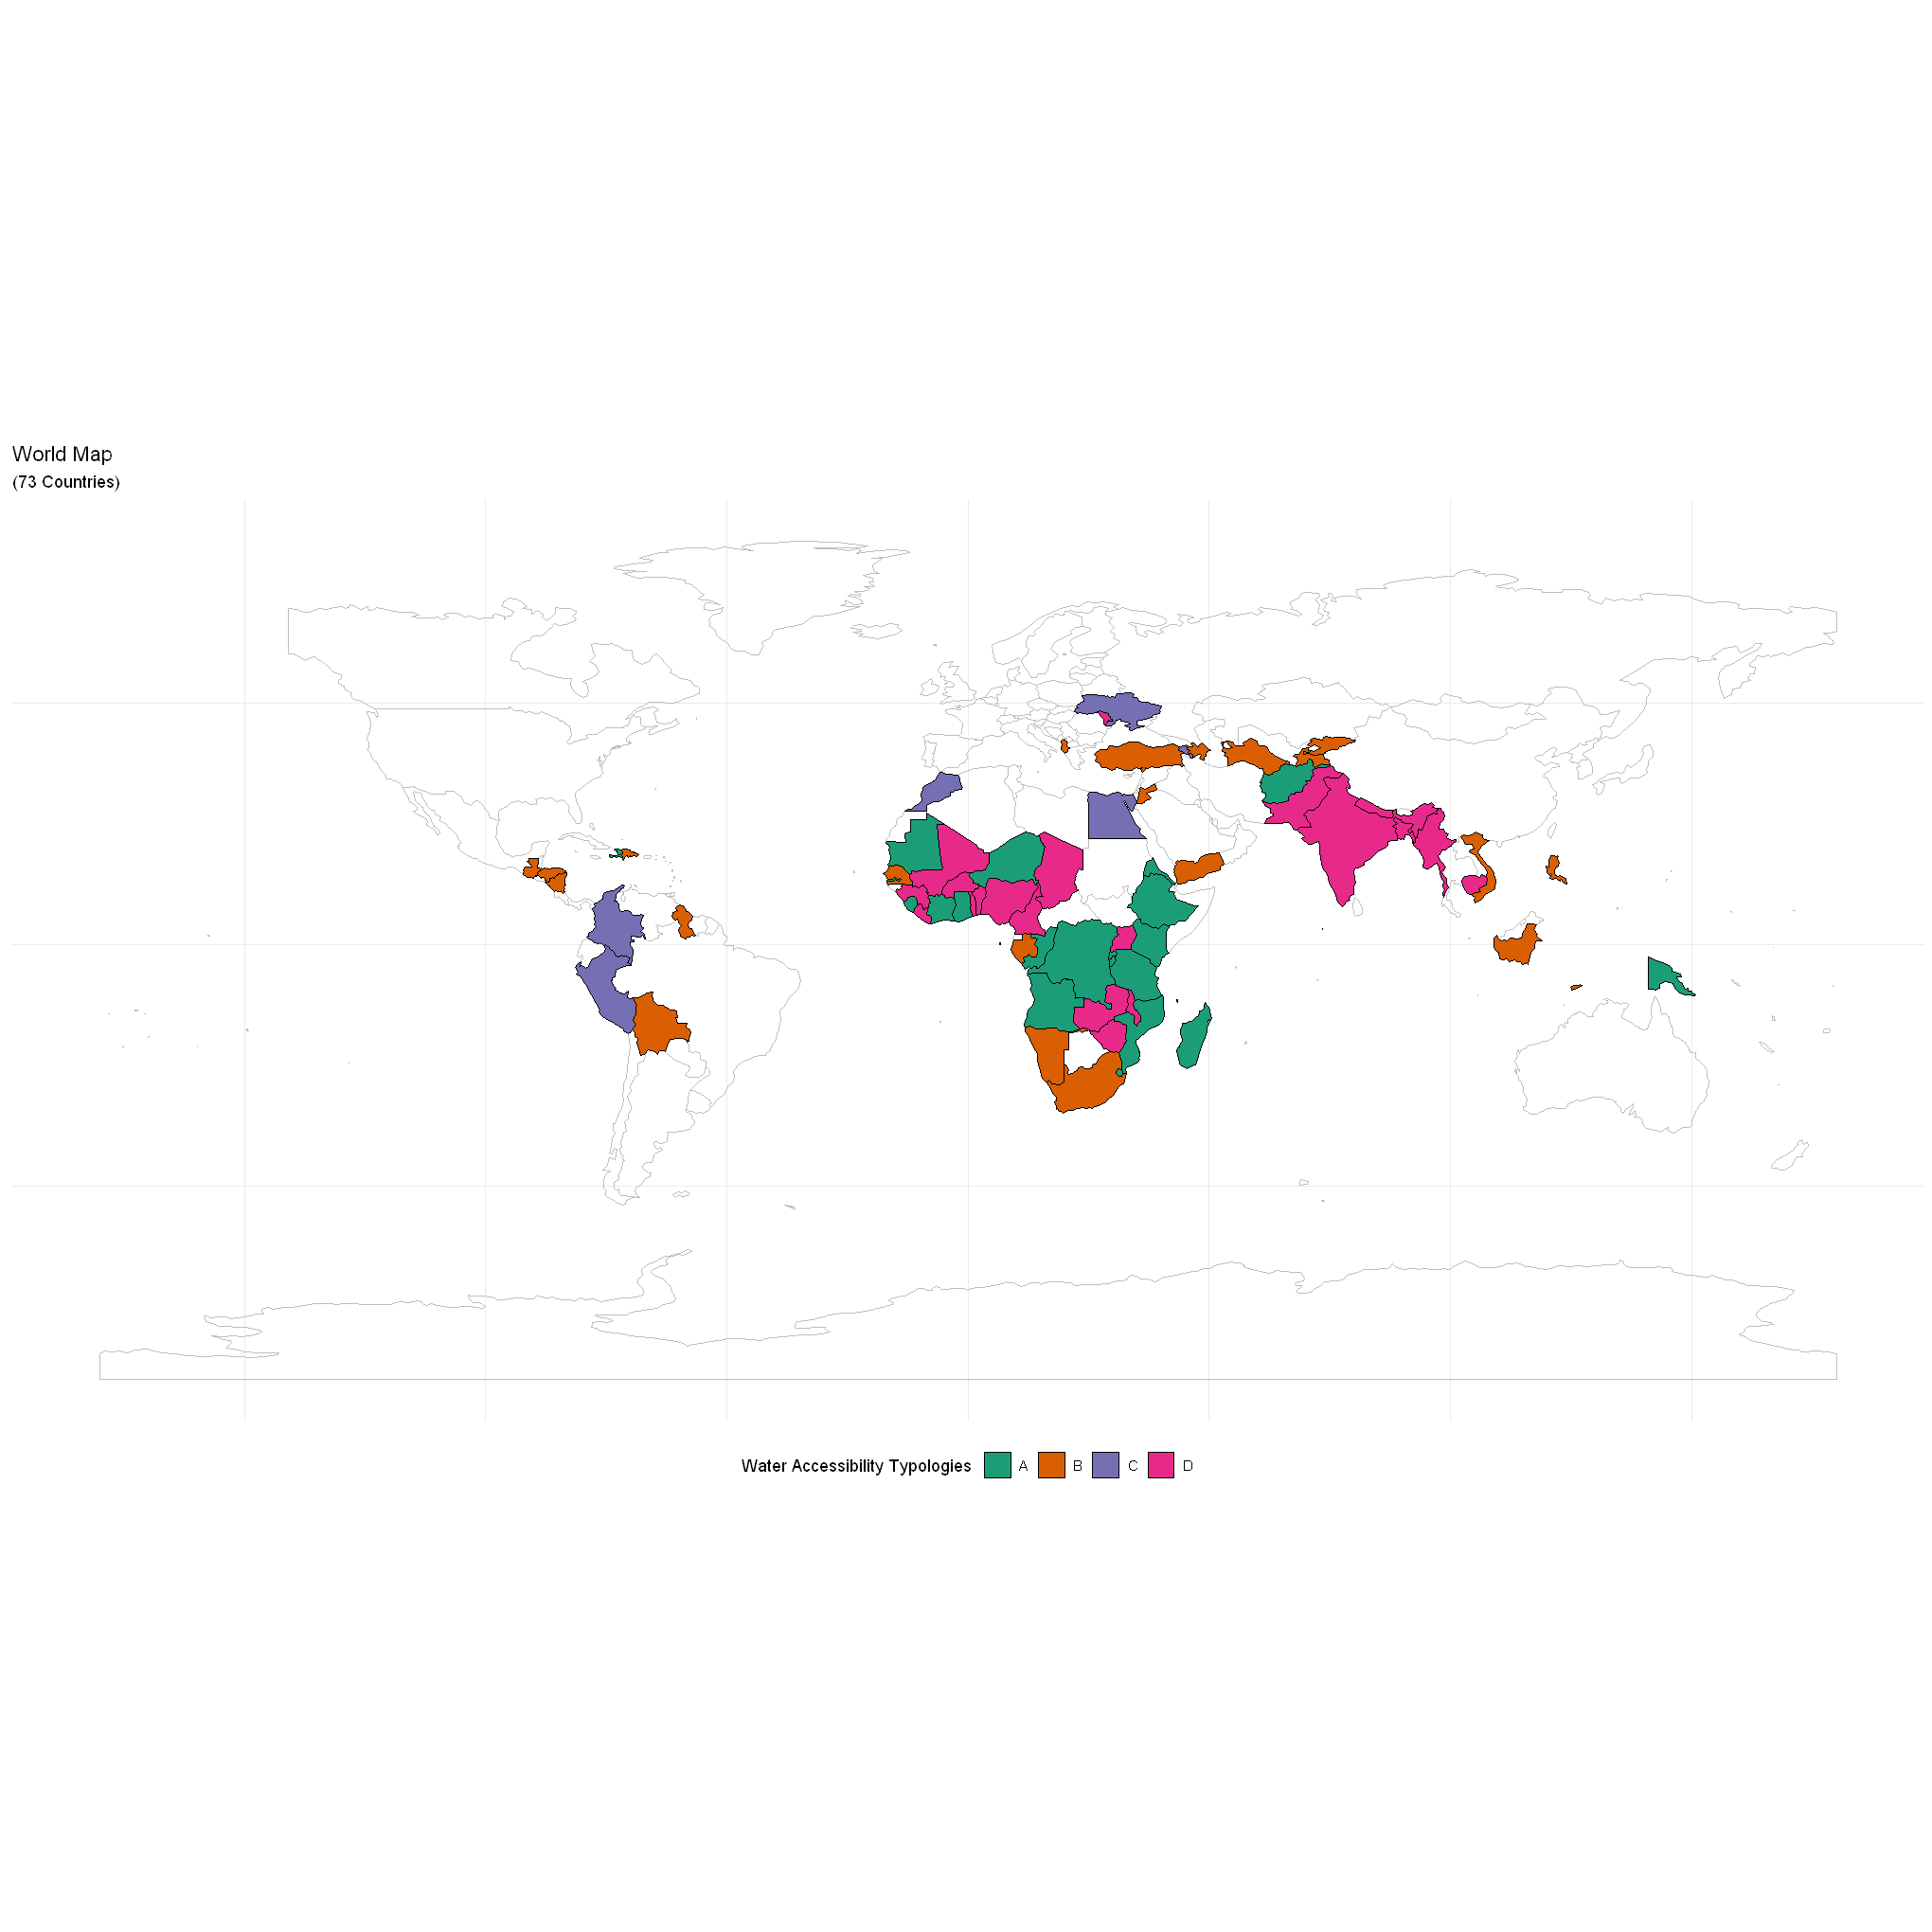

In [186]:
# Plot
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)
ggplot() +
    geom_sf(color = "black", fill= 'antiquewhite') +
    xlab("Longitude") + ylab("Latitude") +
    geom_polygon(data= allCoords, mapping = aes(x =long, y=lat,group = region),color="grey",fill=NA) + 
    geom_polygon( data = waterCoords, mapping = aes(x =long, y=lat,group = region, fill=value), size=.3,color="black") +
    expand_limits(x = waterCoords$long, y = waterCoords$lat)  + 
    scale_fill_brewer(palette='Dark2', name="Water Accessibility Typologies", na.value="grey", labels = c("A", "B", "C","D")) +  #labels = c())+
    ggtitle("World Map", subtitle = paste0("(", length(unique(df$region)), " Countries)")) +
    theme_minimal() +
    theme(legend.position = "bottom",
        axis.ticks = element_blank(), 
        axis.title = element_blank(), 
        axis.text =  element_blank()) 
#     #guides(fill = guide_colorbar(barwidth = 10, barheight = .5))
